In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv
/kaggle/input/global-weather-repository/state.db


In [3]:
data = pd.read_csv("/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv")
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
data.shape

(59828, 41)

In [5]:
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,59828.000000,59828.000000,5.982800e+04,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,...,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000,59828.000000
mean,19.136372,22.183880,1.729181e+09,22.172276,71.911699,8.281527,13.331774,169.169452,1014.160544,29.947551,...,19.113781,528.423501,63.515647,15.099323,11.399454,25.451546,51.112719,1.725513,2.704486,50.122334
std,24.475930,65.814451,7.728229e+06,9.636810,17.346078,9.239047,14.867040,103.691384,13.568113,0.400648,...,16.714823,943.213256,36.226218,26.389319,48.737364,44.617234,157.720758,0.991788,2.591954,35.121061
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.722602e+09,17.000000,62.600000,4.000000,6.500000,80.000000,1010.000000,29.830000,...,10.800000,227.000000,39.000000,0.925000,0.740000,5.700000,8.800000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.729244e+09,25.000000,77.000000,6.900000,11.200000,160.000000,1013.000000,29.920000,...,16.600000,327.100000,60.800000,3.399500,2.300000,13.690000,20.720000,1.000000,2.000000,51.000000
75%,40.400000,50.580000,1.735898e+09,28.400000,83.100000,11.400000,18.400000,257.000000,1018.000000,30.050000,...,25.500000,507.400000,83.000000,16.465000,8.880000,29.785000,45.700000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.742464e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59828 entries, 0 to 59827
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       59828 non-null  object 
 1   location_name                 59828 non-null  object 
 2   latitude                      59828 non-null  float64
 3   longitude                     59828 non-null  float64
 4   timezone                      59828 non-null  object 
 5   last_updated_epoch            59828 non-null  int64  
 6   last_updated                  59828 non-null  object 
 7   temperature_celsius           59828 non-null  float64
 8   temperature_fahrenheit        59828 non-null  float64
 9   condition_text                59828 non-null  object 
 10  wind_mph                      59828 non-null  float64
 11  wind_kph                      59828 non-null  float64
 12  wind_degree                   59828 non-null  int64  
 13  w

Lets make sure about the missing values although its evident above that there are none

In [7]:
data.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [8]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [9]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

In [10]:
data['location_name'].unique(), print(len(data['location_name'].unique()))

248


(array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
        "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
        'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
        'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
        'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
        'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
        'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
        'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
        'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
        'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
        'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
        'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
        'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
        'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
        'Tegu

In [11]:
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [country, location_name, latitude, longitude, timezone, last_updated_epoch, last_updated, temperature_celsius, temperature_fahrenheit, condition_text, wind_mph, wind_kph, wind_degree, wind_direction, pressure_mb, pressure_in, precip_mm, precip_in, humidity, cloud, feels_like_celsius, feels_like_fahrenheit, visibility_km, visibility_miles, uv_index, gust_mph, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index, sunrise, sunset, moonrise, moonset, moon_phase, moon_illumination]
Index: []

[0 rows x 41 columns]


### Key Insights

* This Dataset consists of 59633 rows and 41 columns.

* There are a total of 30 numeric columns(float64/int64) present in the Dataset.

* There are a total of 11 categorical columns present in the Dataset.

* No missing values are present in the Dataset.

* No duplicates are present in the Dataset.

* There are 210 unique values in the Country column.

* There are 248 unique values in the location_name column of this Dataset.

## Univariate Analysis

In [26]:
data['country'] = data['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
data['country'] = data['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
data['country'] = data['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
data['country'] = data['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
data['country'] = data['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)


In [31]:
min_country, max_country = data['country'].min(), data['country'].max()
print(f"The country which occurs minimum in this dataset is: {min_country}")
print(f"The country which occurs maximum in this dataset is: {max_country}")

The country which occurs minimum in this dataset is: Afghanistan
The country which occurs maximum in this dataset is: Zimbabwe


In [33]:
# Number of unique countries present in the dataset
data['country'].nunique()

205

In [34]:
# Number of unique locations present in the dataset
data['location_name'].nunique()

248

In [36]:
# Lets Get the country and location with the highest temperature in Celsius
highest_temp_celsius = data.loc[data['temperature_celsius'].idxmax(), ['country', 'location_name', 'temperature_celsius']]
print("Country and Location with the Highest Temperature in Celsius:")
print(highest_temp_celsius)

Country and Location with the Highest Temperature in Celsius:
country                     Kuwait
location_name          Kuwait City
temperature_celsius           49.2
Name: 6896, dtype: object


In [42]:
# Lets Get the country and location with the highest temperature in Fahrenheit
highest_temp_fahrenheit = data.loc[data['temperature_fahrenheit'].idxmax(), ['country', 'location_name', 'temperature_fahrenheit']]
print("\nCountry and Location with the Highest Temperature in Fahrenheit:")
print(highest_temp_fahrenheit)


Country and Location with the Highest Temperature in Fahrenheit:
country                        Kuwait
location_name             Kuwait City
temperature_fahrenheit          120.6
Name: 6896, dtype: object


In [46]:
# Lets Get the country and location with the highest temperature in Fahrenheit
lowest_temp_fahrenheit = data.loc[data['temperature_fahrenheit'].idxmin(), ['country', 'location_name', 'temperature_fahrenheit']]
print("\nCountry and Location with the Lowest Temperature in Fahrenheit:")
print(lowest_temp_fahrenheit)


Country and Location with the Lowest Temperature in Fahrenheit:
country                      Mongolia
location_name             Ulaanbaatar
temperature_fahrenheit          -12.8
Name: 51564, dtype: object


In [47]:
# Lets Get the country and location with the highest temperature in Celsius
lowest_temp_celsius = data.loc[data['temperature_celsius'].idxmin(), ['country', 'location_name', 'temperature_celsius']]
print("Country and Location with the Lowest Temperature in Celsius:")
print(lowest_temp_celsius)

Country and Location with the Lowest Temperature in Celsius:
country                   Mongolia
location_name          Ulaanbaatar
temperature_celsius          -24.9
Name: 51564, dtype: object


### Observations:
* The Highest Temperature in Celsius in Kuwait is 49.2 in Kuwait, and The Highest Temperature in Fahrenheit is also in Kuwait. The Highest Temperature in Fahrenheit in Kuwait is: 120.6 in Kuwait
* According to this Dataset the lowest Temperature in Celsius is present in Mongolia in Ulaanbaatar with -12.8 fahrenheit and -24.9 celsius.

In [49]:
# Lets Find the country and location with the highest latitude
highest_latitude = data.loc[data['latitude'].idxmax(), ['country', 'location_name', 'latitude']]
print("Country and Location with the Highest Latitude:")
print(highest_latitude)

# Lets Find the country and location with the highest longitude
highest_longitude = data.loc[data['longitude'].idxmax(), ['country', 'location_name', 'longitude']]
print("\nCountry and Location with the Highest Longitude:")
print(highest_longitude)

Country and Location with the Highest Latitude:
country            Iceland
location_name    Reykjavik
latitude             64.15
Name: 8032, dtype: object

Country and Location with the Highest Longitude:
country            Tuvalu
location_name    Funafuti
longitude          179.22
Name: 181, dtype: object


In [50]:
# Lets Find the country and location with the highest latitude
lowest_latitude = data.loc[data['latitude'].idxmin(), ['country', 'location_name', 'latitude']]
print("Country and Location with the Lowest Latitude:")
print(lowest_latitude)

# Lets Find the country and location with the highest longitude
lowest_longitude = data.loc[data['longitude'].idxmin(), ['country', 'location_name', 'longitude']]
print("\nCountry and Location with the Lowest Longitude:")
print(lowest_longitude)

Country and Location with the Lowest Latitude:
country          New Zealand
location_name     Wellington
latitude               -41.3
Name: 123, dtype: object

Country and Location with the Lowest Longitude:
country               Tonga
location_name    Nuku`Aloia
longitude            -175.2
Name: 176, dtype: object


### Observations:
* The country and location with the highest lattitude seems to be Reykjavik,Iceland according to the dataset
* The country and location with the highest longitude seems to be Funafuti,Tuvalu according to the dataset
* The country and location with the lowest lattitude seems to be Wellington,New Zealand according to the dataset
* The country and location with the lowest longitude seems to be Nuku`Aloia,Tonga according to the dataset

In [54]:
# Convert date columns to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'], errors='coerce')
data['sunrise'] = pd.to_datetime(data['sunrise'], errors='coerce')
data['sunset'] = pd.to_datetime(data['sunset'], errors='coerce')
data['moonrise'] = pd.to_datetime(data['moonrise'], errors='coerce')
data['moonset'] = pd.to_datetime(data['moonset'], errors='coerce')

<ipython-input-54-e8f840041034>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sunrise'] = pd.to_datetime(data['sunrise'], errors='coerce')
<ipython-input-54-e8f840041034>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sunset'] = pd.to_datetime(data['sunset'], errors='coerce')
<ipython-input-54-e8f840041034>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['moonrise'] = pd.to_datetime(data['moonrise'], errors='coerce')
<ipython-input-54-e8f840041034>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `da

In [66]:
# total time it has been since the dataset has been updated
print("Last Updated Time", data["last_updated"].max())
print("First Updated Time", data["last_updated"].min())
print("Total time the dataset has been updating", data["last_updated"].max() - data['last_updated'].min())

Last Updated Time 2025-03-20 22:45:00
First Updated Time 2024-05-16 01:45:00
Total time the dataset has been updating 308 days 21:00:00


In [65]:
# number of updated there has been in 2024
len(data[data["last_updated"].dt.year == 2024])

44469

In [67]:
# number of updated there has been in 2025
len(data[data["last_updated"].dt.year == 2025])

15359

### Observations:
* The dataset was first updated on 16th May 2024  and last updated on 20th March 2025.
* The data is constantly updating since 308 days.
* There were a total of 44469 updates happened on 2024 and 15359 updates in 2025


In [78]:
# Month with the maximum humidity throughout the recorded time of the year.
data['month'] = data['last_updated'].dt.month
data.groupby(['month'])['humidity'].mean().idxmax()

11

In [92]:
# location with the maximum recorded wind speed
print("Wind speed of ", data["wind_mph"].max(), "mph")
data[data["wind_mph"] == data["wind_mph"].max()]["location_name"]

Wind speed of  1841.2 mph


7601    Bujumbura
Name: location_name, dtype: object

In [86]:
# Lets check that how many locations have a moon phase listed as "Full Moon"
full_moon_count = data[data['moon_phase'] == 'Full Moon'].shape[0]
print(f"Locations with Full Moon: {full_moon_count}")


Locations with Full Moon: 2231


In [87]:
# Month with the maximum temperature throughout the recorded time of the year.
data.groupby(['month'])['temperature_celsius'].mean().idxmax()

7

In [ ]:
# Lets check that how many locations have a moon phase listed as "Full Moon"
full_moon_count = df[df['moon_phase'] == 'Full Moon'].shape[0]
print(f"Locations with Full Moon: {full_moon_count}")


### Observations
* November was the month with maximum humidity
* Bujumbura recorded the max wind speed with 1841.2 mph.
* There were 2231location with full moon in the recorded duration
* July was the month with highest average temperature recorded whereas January was the month with the lowest.

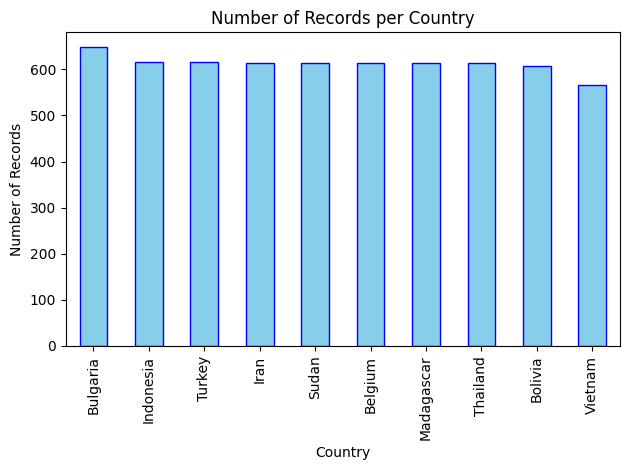

In [108]:
country_counts = data.groupby('country').size().nlargest(10)

# Plot the bar chart
country_counts.plot(kind='bar', color='skyblue', edgecolor='blue')
plt.title('Number of Records per Country')
plt.xlabel('Country')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [109]:
country_counts

country
Bulgaria      648
Indonesia     617
Turkey        615
Iran          614
Sudan         614
Belgium       613
Madagascar    613
Thailand      613
Bolivia       607
Vietnam       566
dtype: int64

In [110]:
categorical_columns = ['moon_phase', 'condition_text', 'wind_direction', 'country']

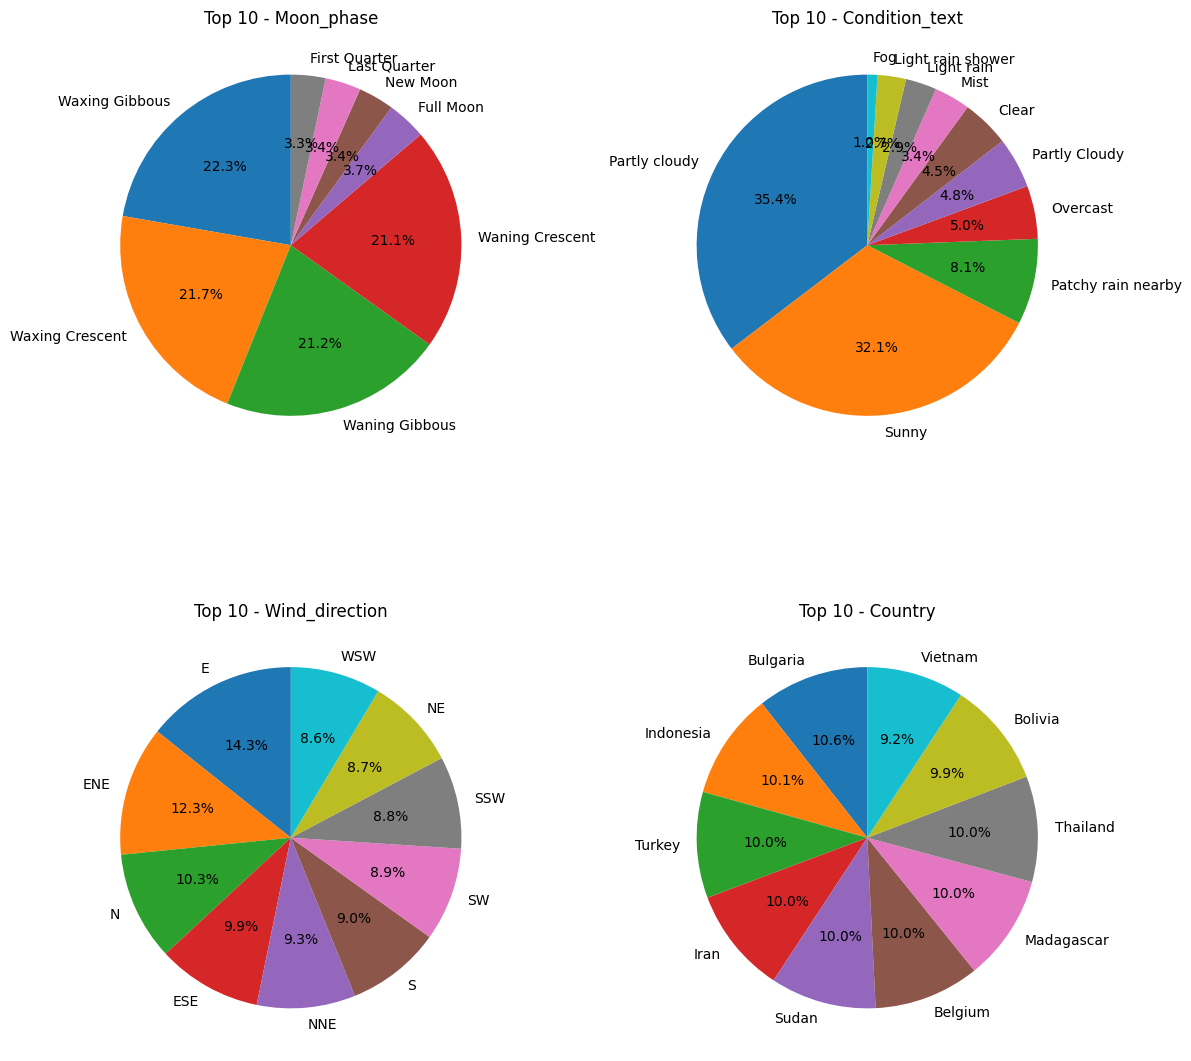

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    category_count = data.groupby(col).size().nlargest(10)
    axes[i].pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Top 10 - {col.capitalize()}')

plt.tight_layout()
plt.show()

### Observations:
* Waxing Gibbous, Waxing Crescent, Waning Gibbous and Wanning Crescent are the most prominent moon phases.
* Sunny and Partly Cloudy are  the most prevalent weather conditions in the locations recorded.
* East bound and ENE bound winds comprise the majority of the conditions.
* Bulgaria leads the most recorded country followed by Indonesia and then Turkiye.

In [117]:
top10_countries = data.groupby('country').size().nlargest(10).index    

<Figure size 1200x600 with 0 Axes>

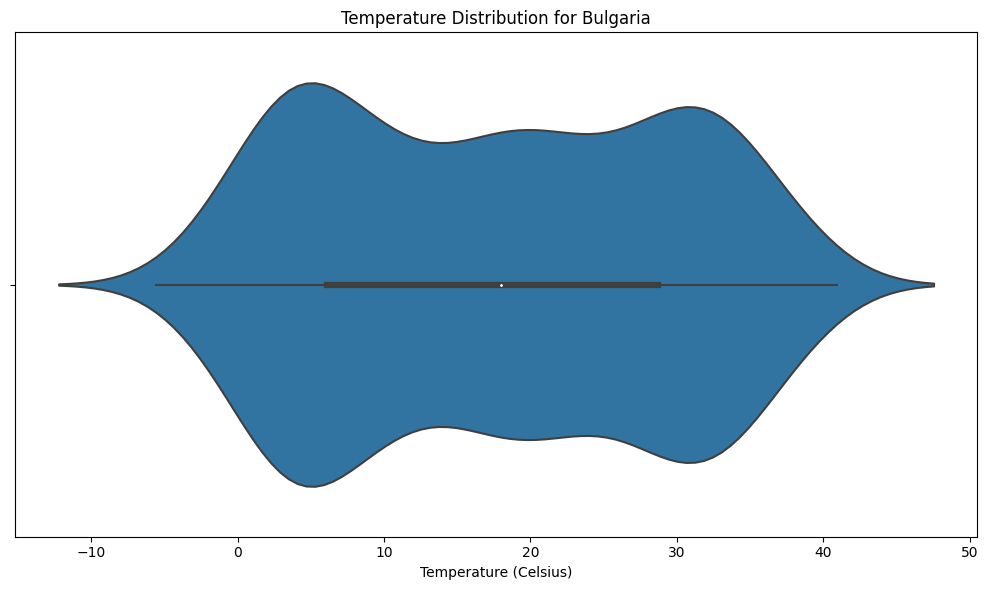

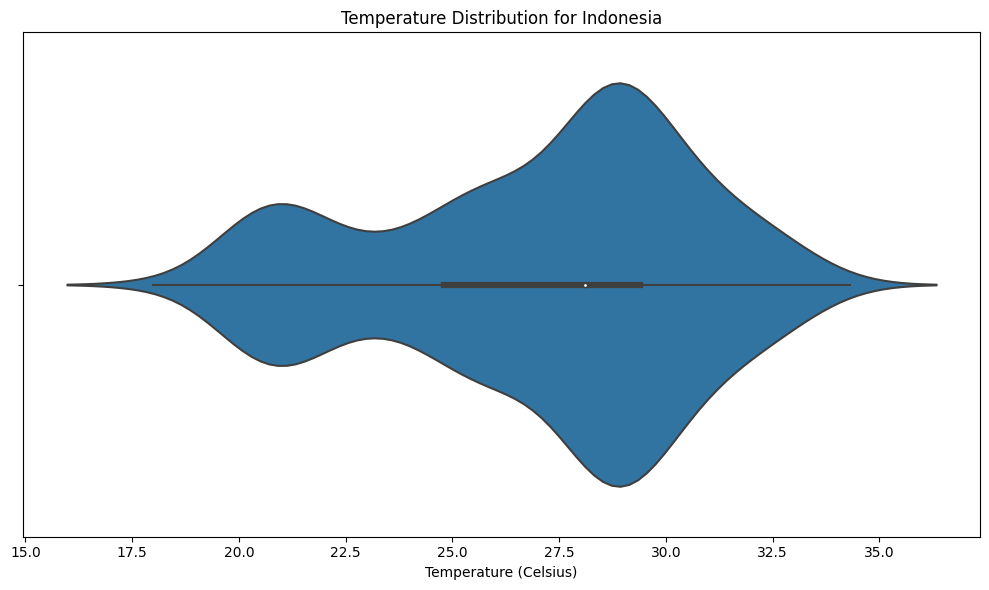

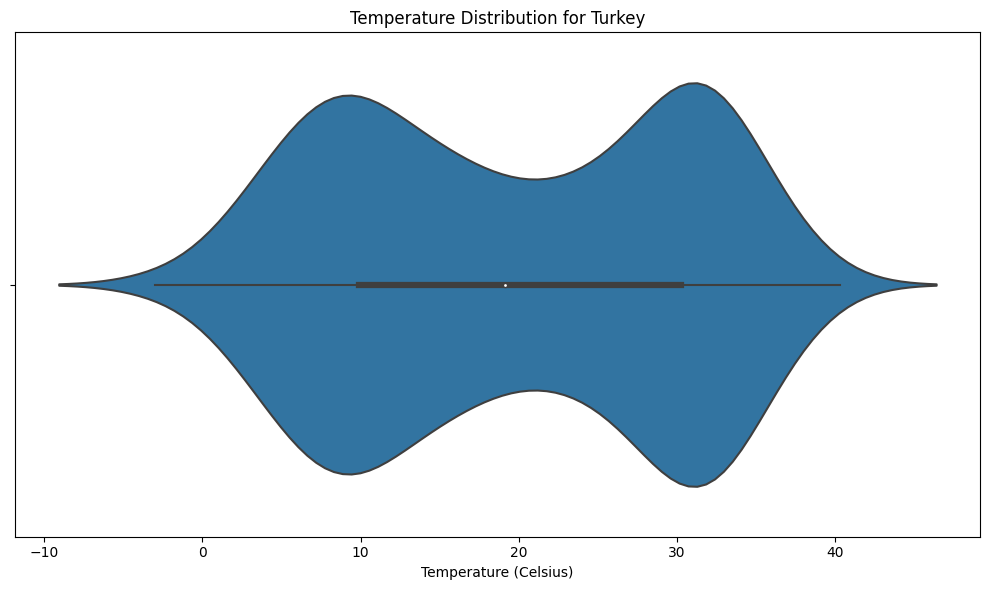

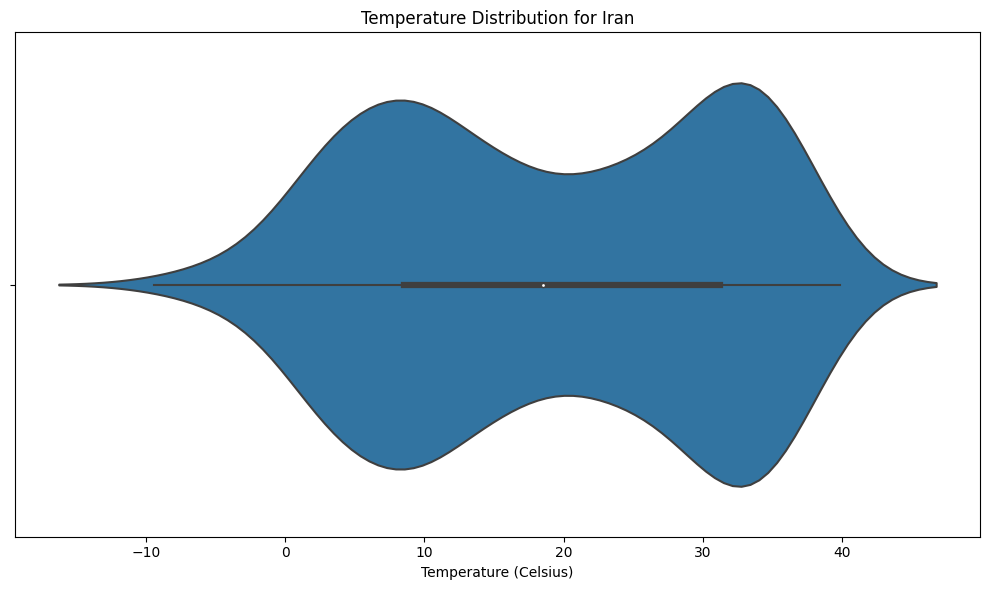

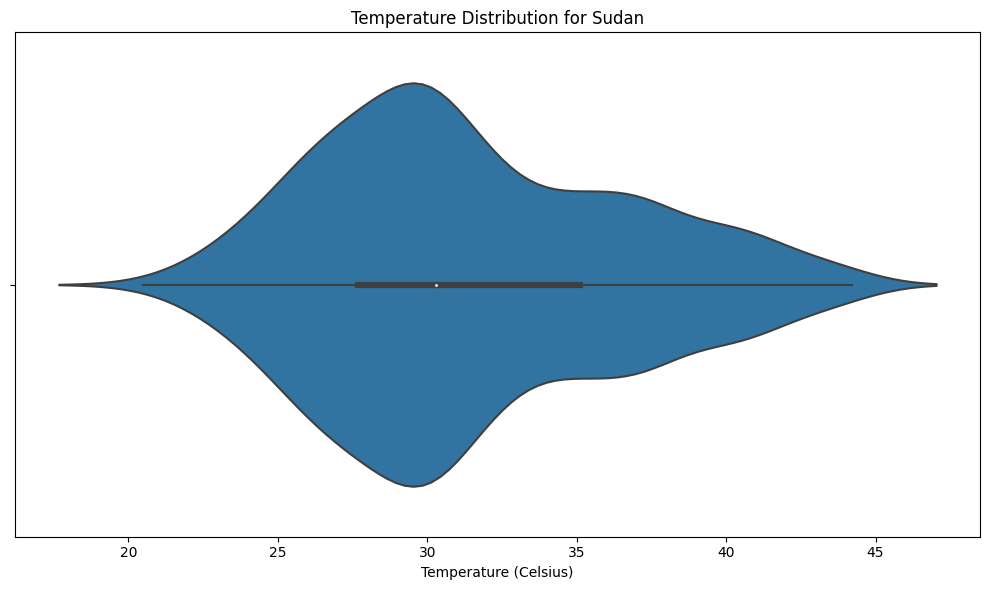

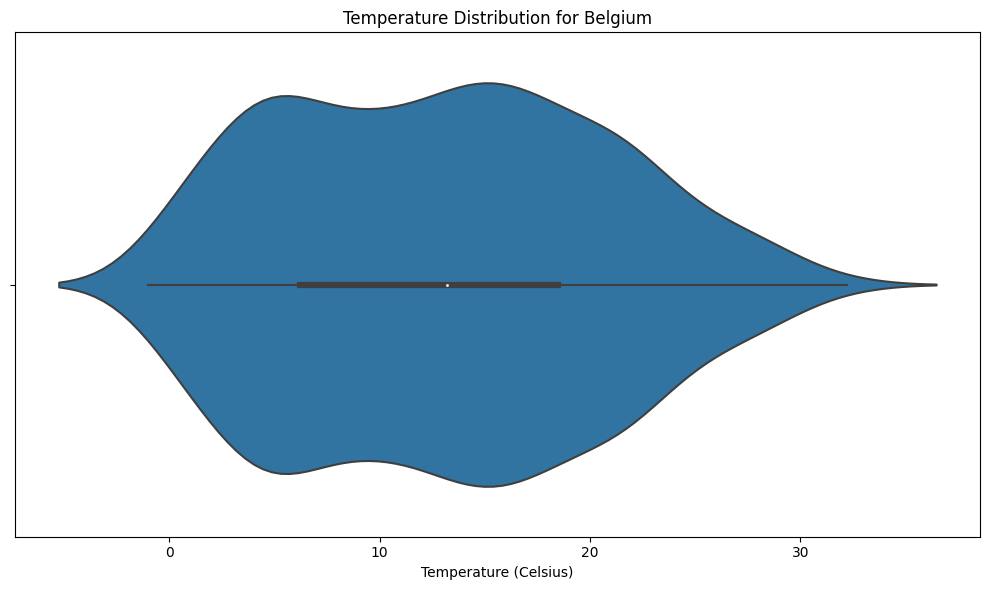

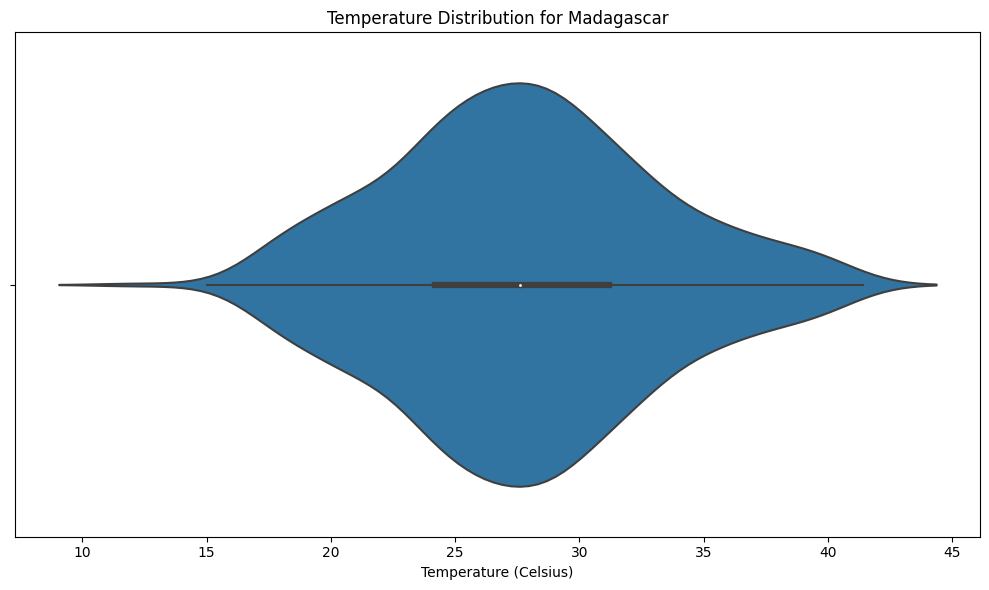

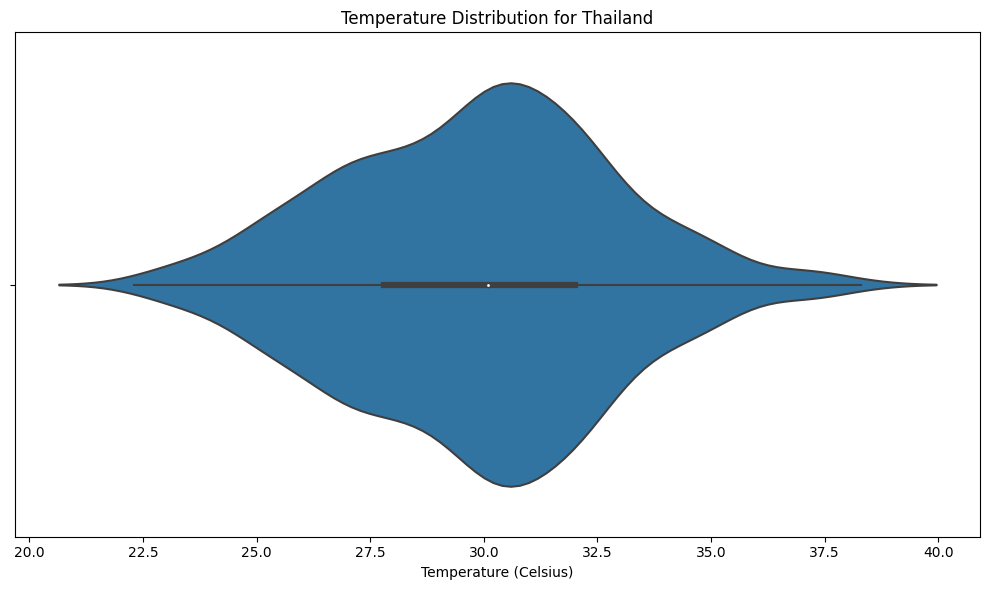

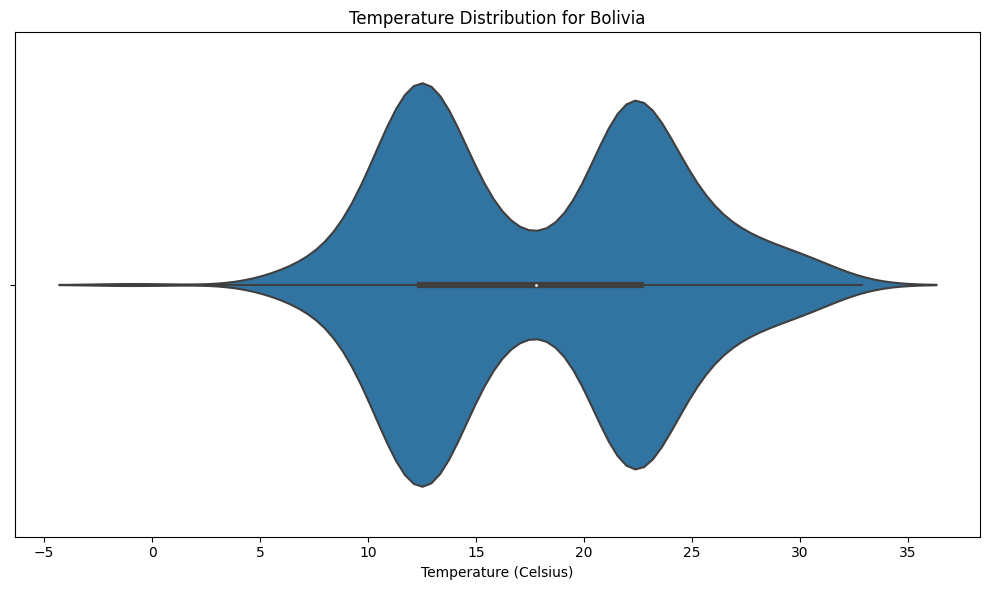

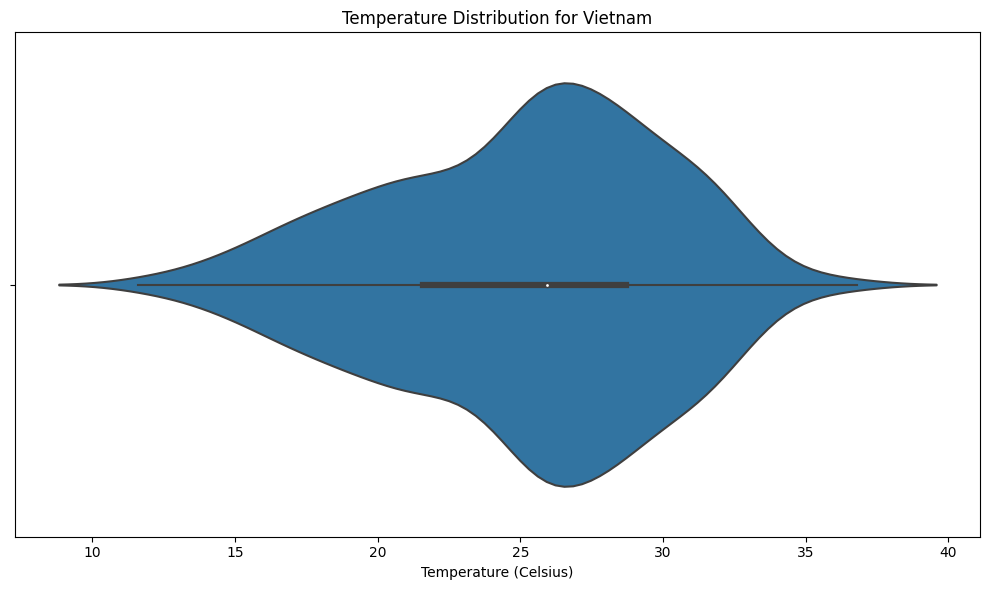

In [119]:
plt.figure(figsize=(12, 6))

# Loop through each of the top 10 countries and plot a boxplot for temperature_celsius
for country in top10_countries:
    plt.figure(figsize=(10, 6))
    # Filter data for each country
    country_data = data[data['country'] == country]
    
    # Plot boxplot for 'temperature_celsius'
    sns.violinplot(x=country_data['temperature_celsius'])
    plt.title(f'Temperature Distribution for {country}')
    plt.xlabel('Temperature (Celsius)')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

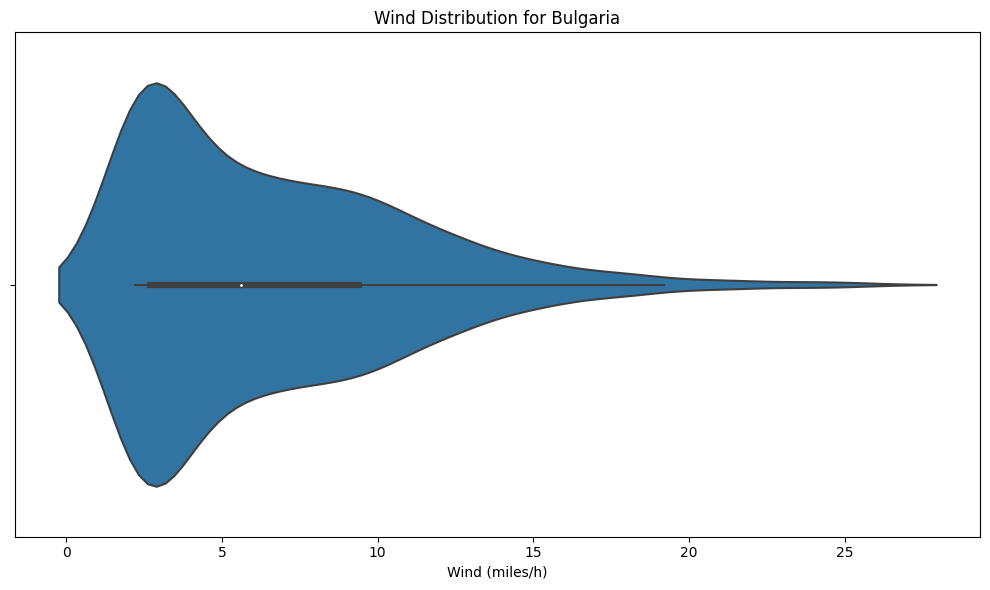

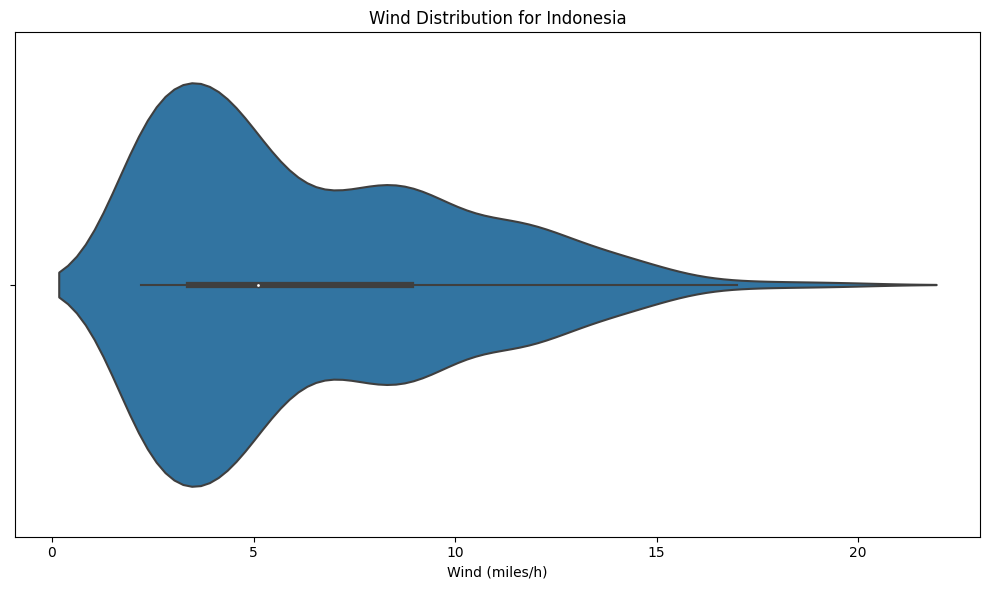

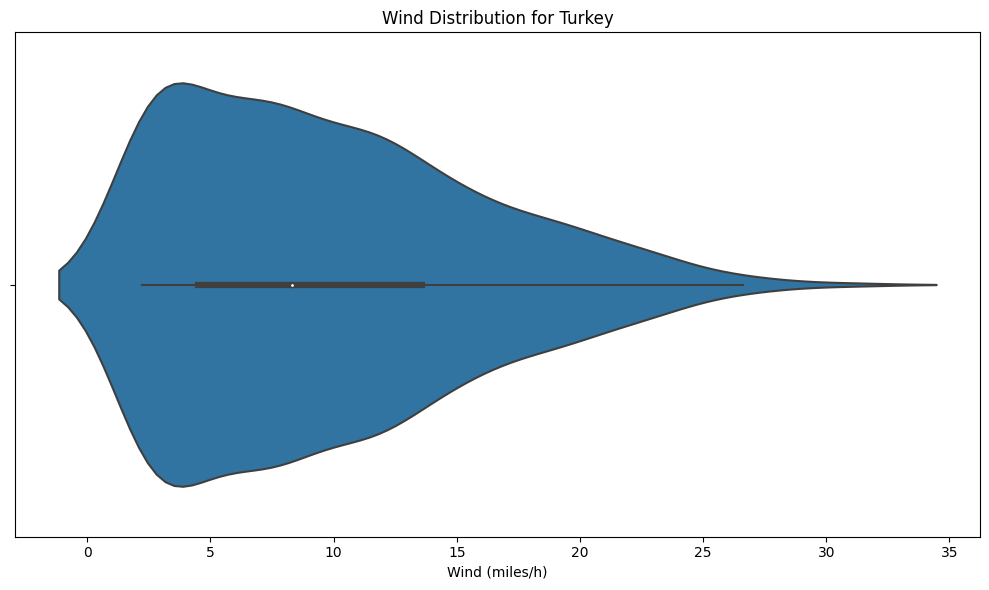

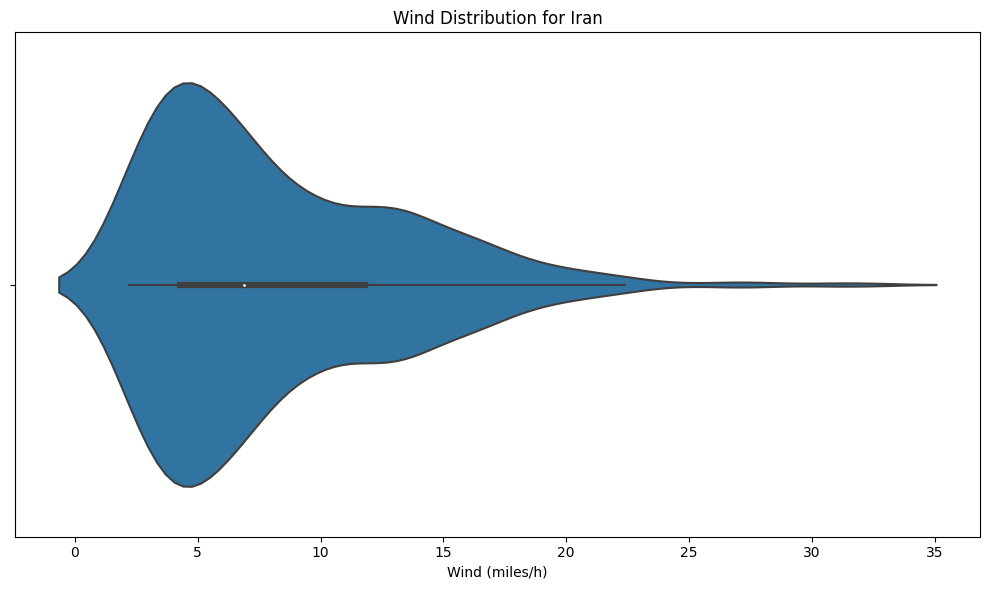

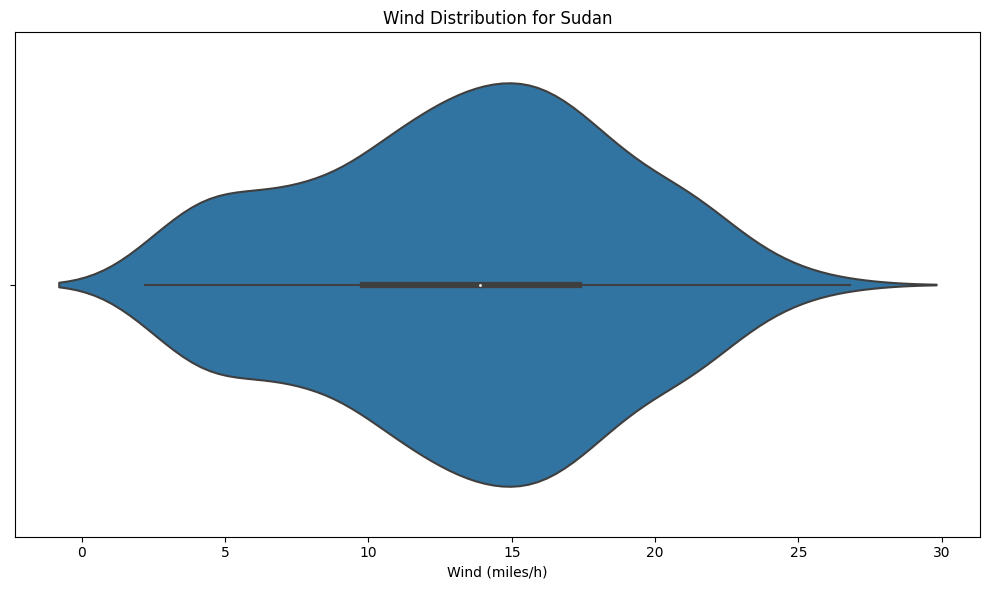

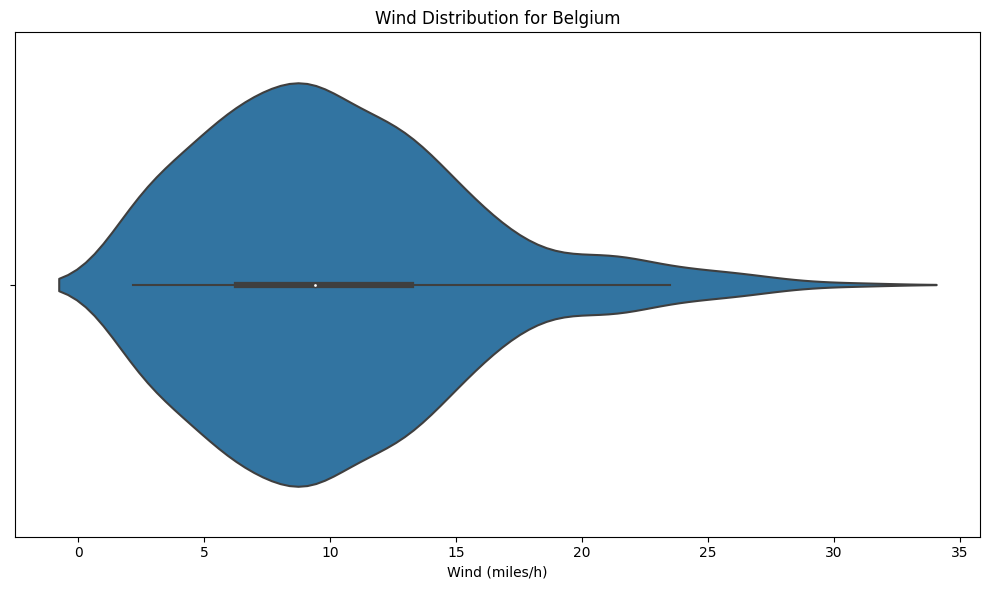

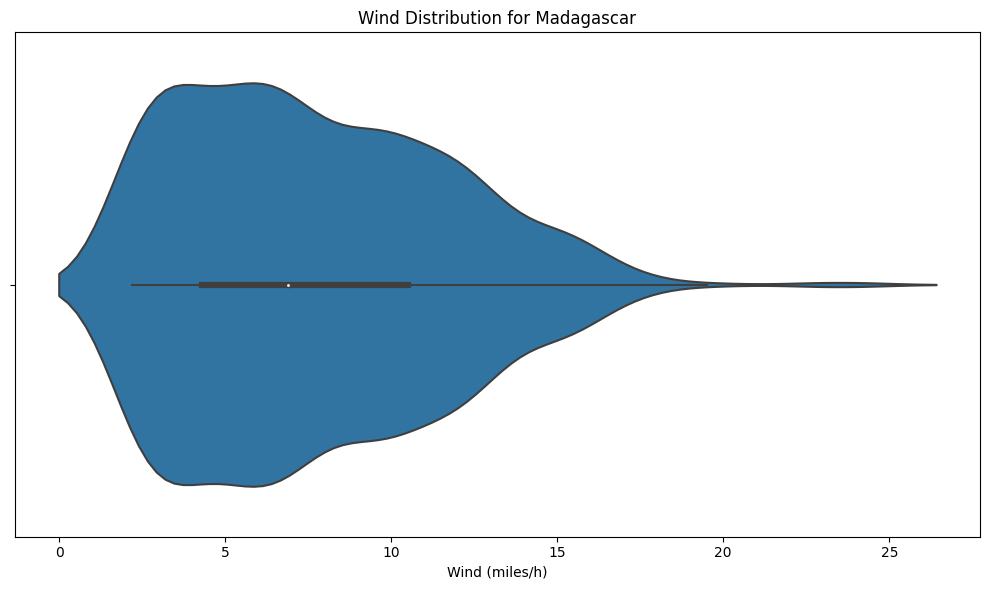

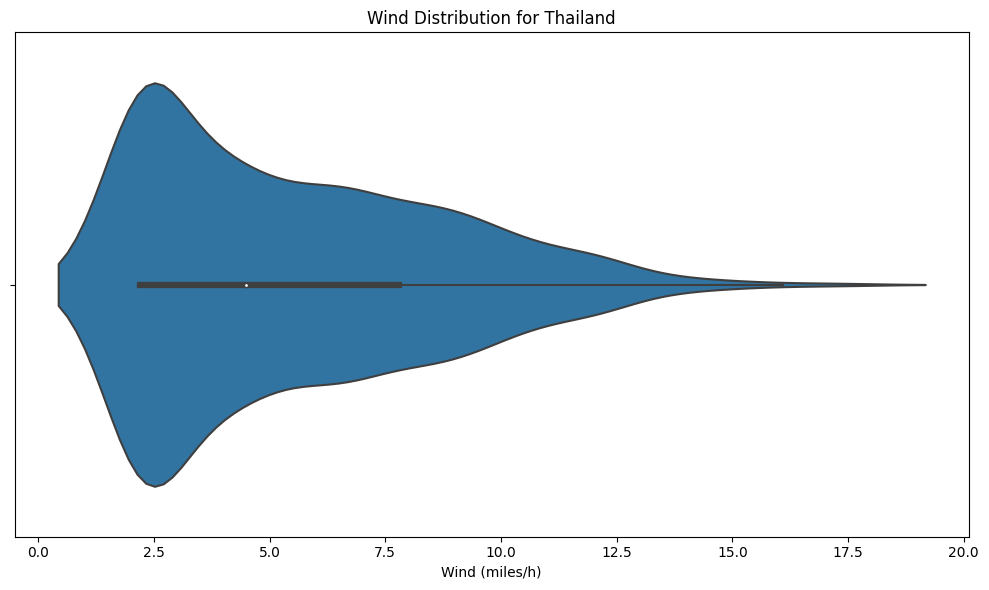

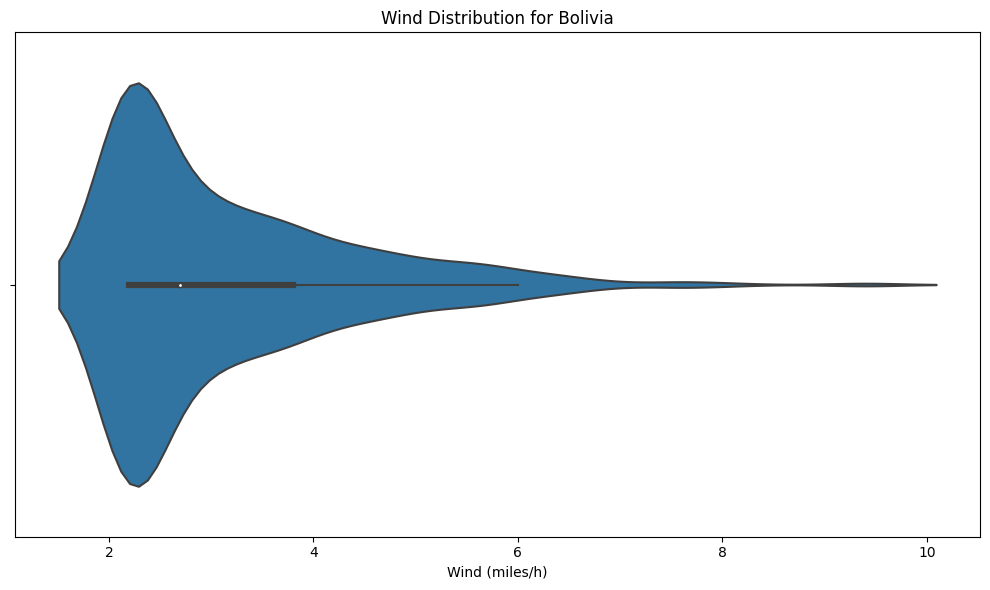

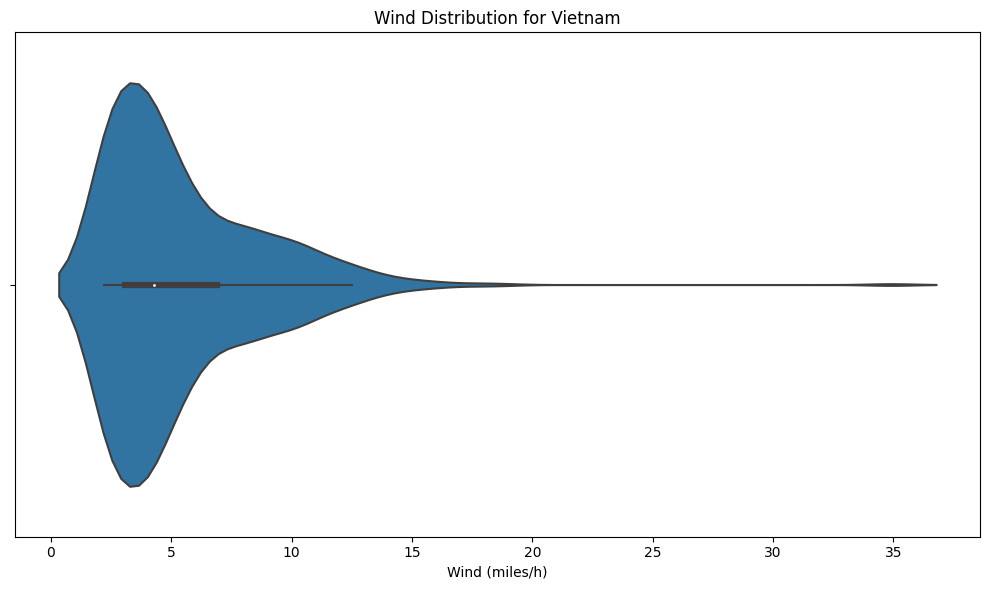

In [120]:
plt.figure(figsize=(12, 6))

# Loop through each of the top 10 countries and plot a boxplot for temperature_celsius
for country in top10_countries:
    plt.figure(figsize=(10, 6))
    # Filter data for each country
    country_data = data[data['country'] == country]
    
    # Plot boxplot for 'temperature_celsius'
    sns.violinplot(x=country_data['wind_mph'])
    plt.title(f'Wind Distribution for {country}')
    plt.xlabel('Wind (miles/h)')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

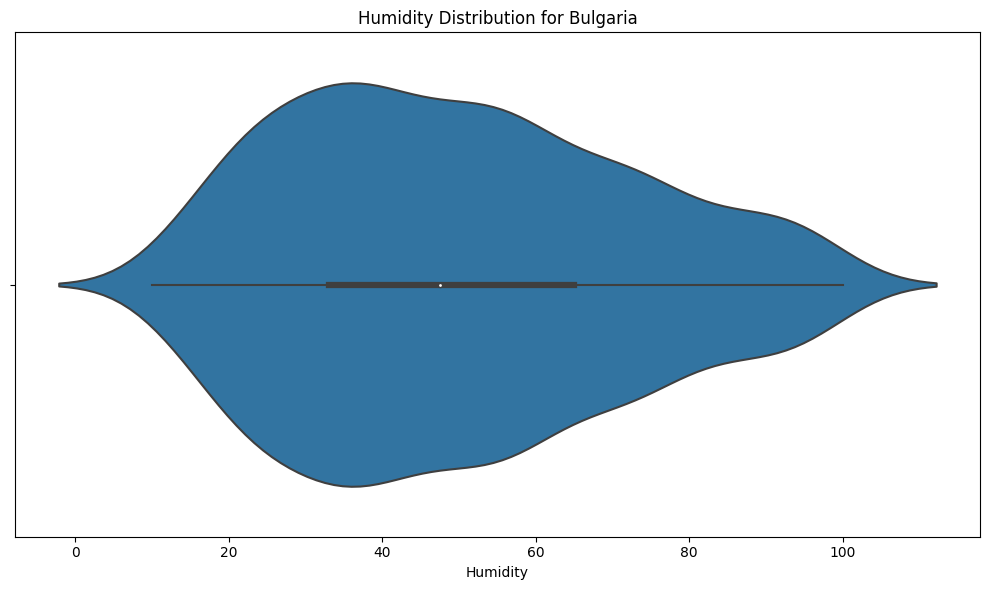

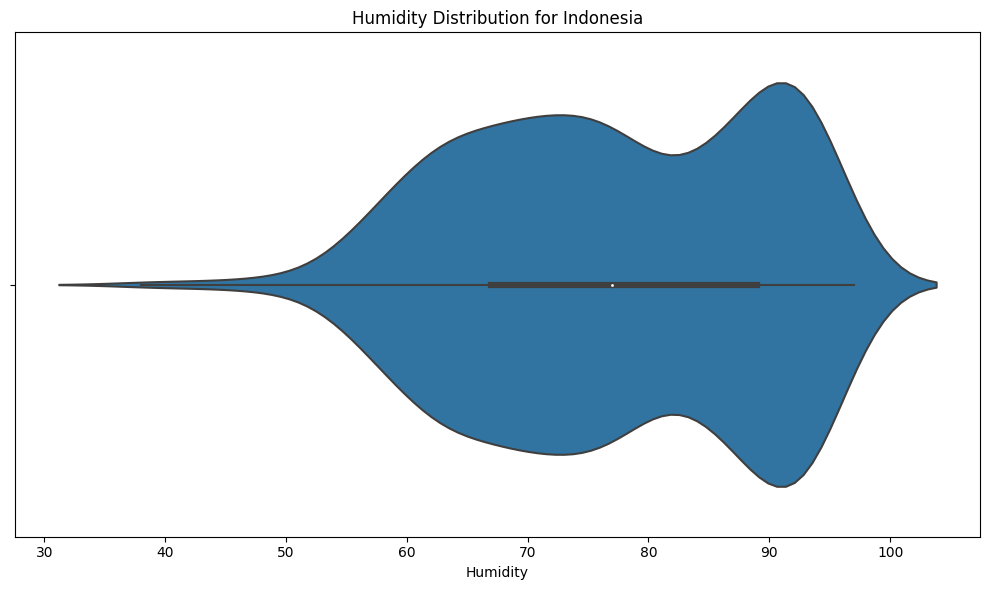

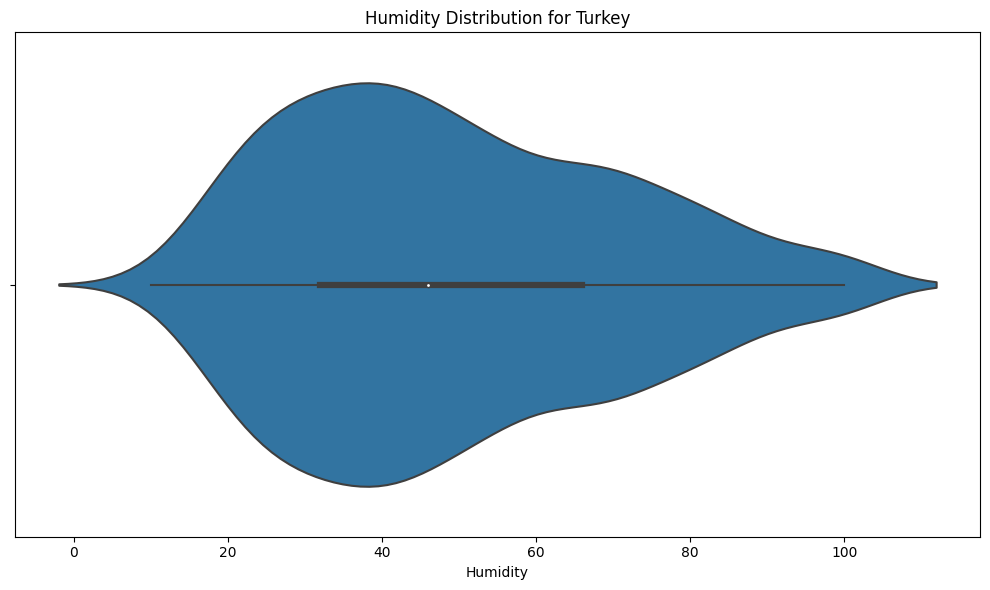

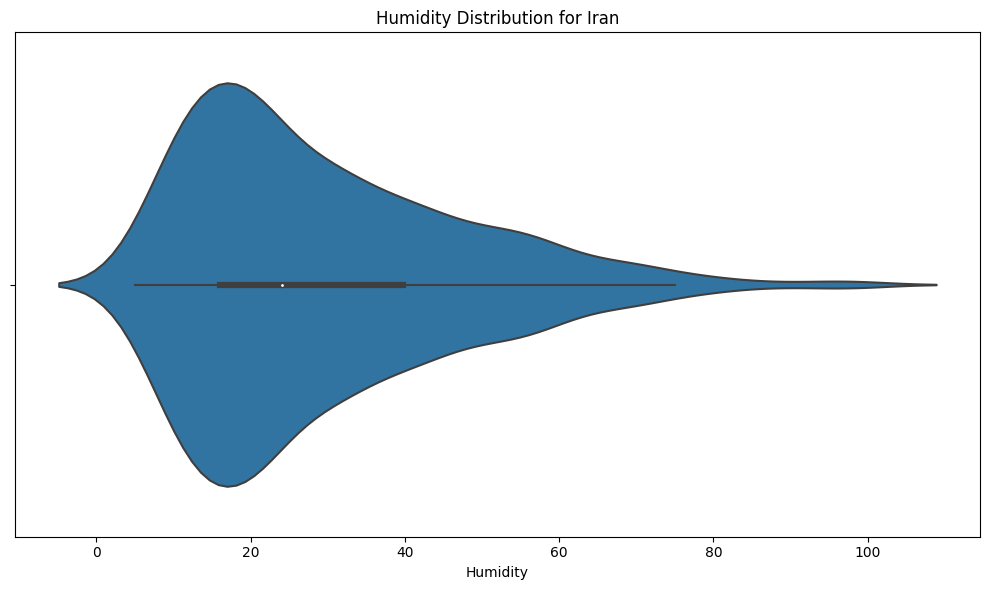

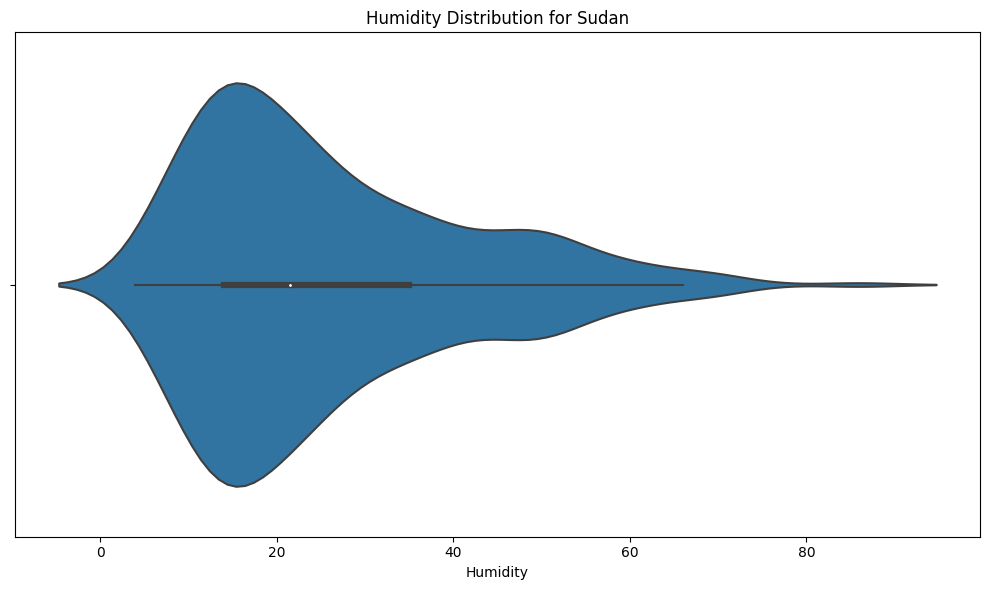

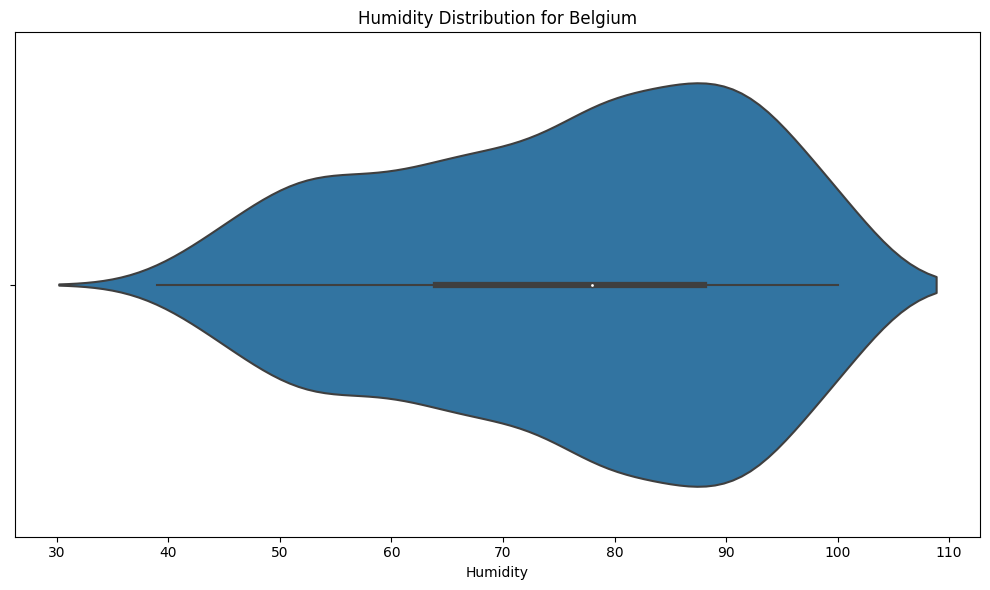

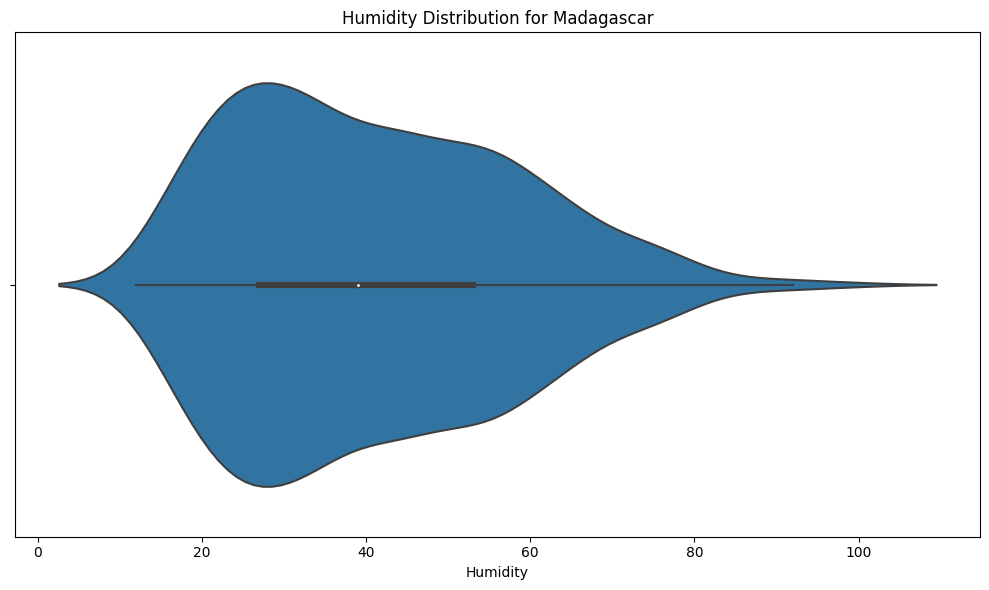

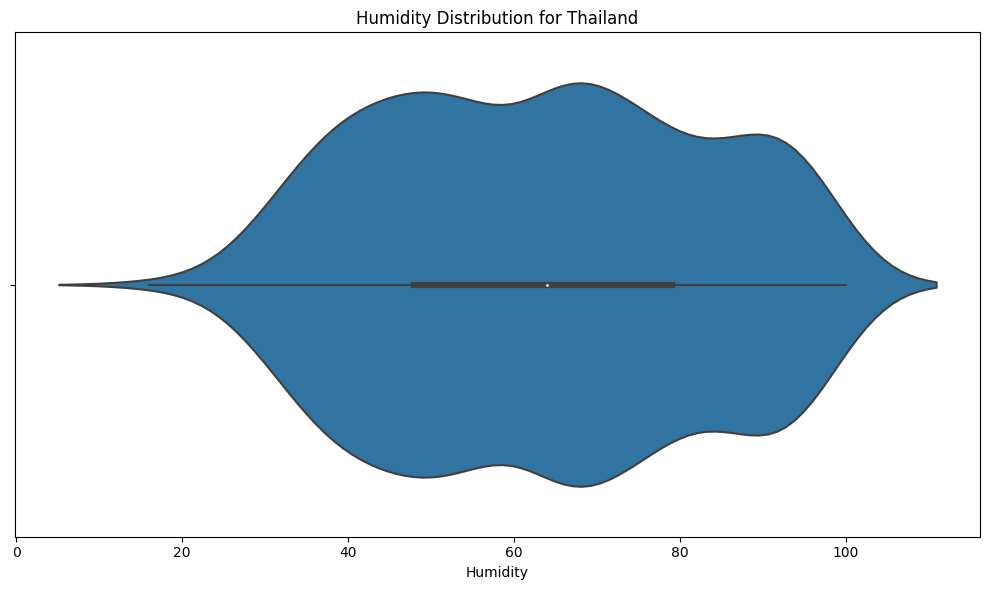

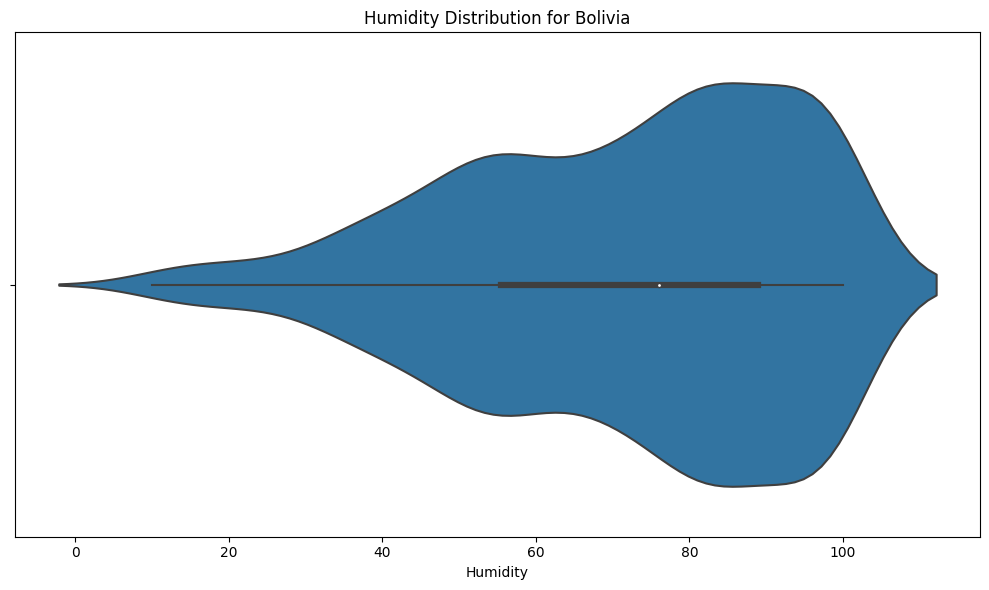

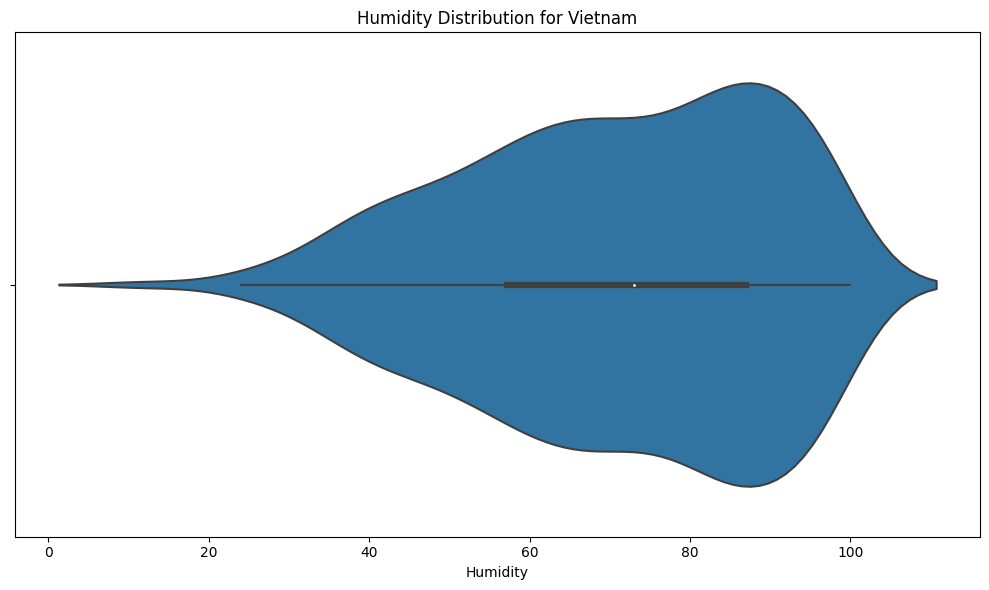

In [121]:
plt.figure(figsize=(12, 6))

# Loop through each of the top 10 countries and plot a boxplot for temperature_celsius
for country in top10_countries:
    plt.figure(figsize=(10, 6))
    # Filter data for each country
    country_data = data[data['country'] == country]
    
    # Plot boxplot for 'temperature_celsius'
    sns.violinplot(x=country_data['humidity'])
    plt.title(f'Humidity Distribution for {country}')
    plt.xlabel('Humidity')
    plt.tight_layout()
    plt.show()

In [123]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'month'],
      dtype='object')

## Bivariate analysis for Precipitation and Temperature

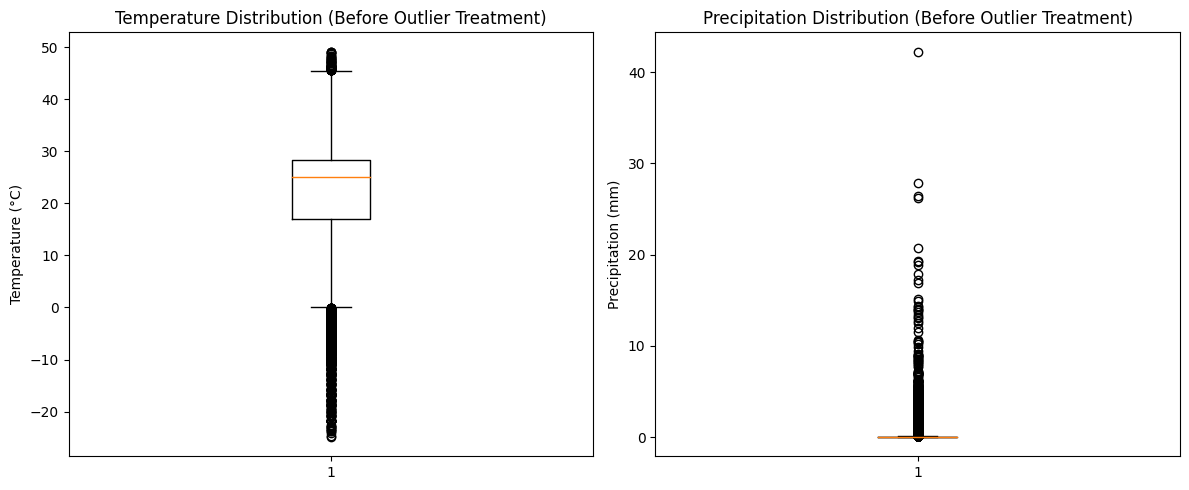

In [125]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data['temperature_celsius'])
plt.title('Temperature Distribution (Before Outlier Treatment)')
plt.ylabel('Temperature (°C)')

plt.subplot(1, 2, 2)
plt.boxplot(data['precip_mm'])
plt.title('Precipitation Distribution (Before Outlier Treatment)')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

In [128]:
# Z score helps us in estimating how far the data point is from the mean. Generally we see  the z score  > 3 or < -3 are outliers.


from scipy import stats

data['temperature_zscore'] = stats.zscore(data['temperature_celsius'])
data['precip_zscore'] = stats.zscore(data['precip_mm'])


# Identify outliers based on z-score (e.g., z-score > 3 or z-score < -3)
temperature_outliers = data[abs(data['temperature_zscore']) > 3]
precip_outliers = data[abs(data['precip_zscore']) > 3]

print(f"Number of temperature outliers: {len(temperature_outliers)}")
print(f"Number of precipitation outliers: {len(precip_outliers)}")

Number of temperature outliers: 306
Number of precipitation outliers: 763


In [132]:
# Z score is the X-mean/STD hence lets calculate the X that are greater than 3* std + mean and 3*std - mean values to set the boundary


upper_temp_limit = data['temperature_celsius'].mean() + 3 * data['temperature_celsius'].std()
lower_temp_limit = data['temperature_celsius'].mean() - 3 * data['temperature_celsius'].std()
data['temperature_celsius'] = data['temperature_celsius'].clip(lower_temp_limit, upper_temp_limit)

upper_precip_limit = data['precip_mm'].mean() + 3 * data['precip_mm'].std()
lower_precip_limit = data['precip_mm'].mean() - 3 * data['precip_mm'].std()
data['precip_mm'] = data['precip_mm'].clip(lower_precip_limit, upper_precip_limit)


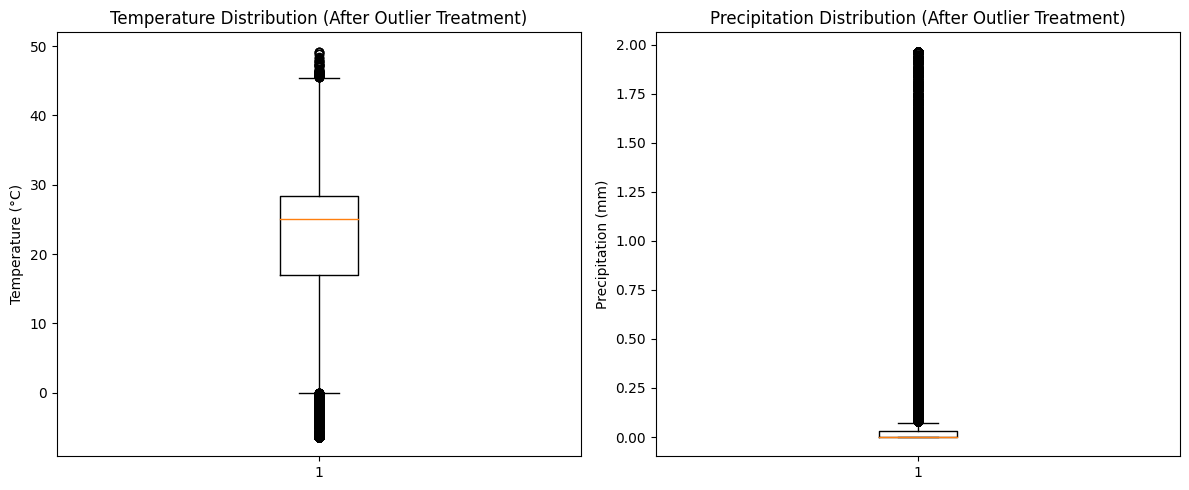

In [134]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data['temperature_celsius'])
plt.title('Temperature Distribution (After Outlier Treatment)')
plt.ylabel('Temperature (°C)')

plt.subplot(1, 2, 2)
plt.boxplot(data['precip_mm'])
plt.title('Precipitation Distribution (After Outlier Treatment)')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

In [138]:
data['year'] = data['last_updated'].dt.year
data['day_of_week'] = data['last_updated'].dt.dayofweek
display(data[['last_updated', 'year', 'month', 'day_of_week']].head())

,last_updated,year,month,day_of_week
0,2024-05-16 13:15:00,2024,5,3
1,2024-05-16 10:45:00,2024,5,3
2,2024-05-16 09:45:00,2024,5,3
3,2024-05-16 10:45:00,2024,5,3
4,2024-05-16 09:45:00,2024,5,3


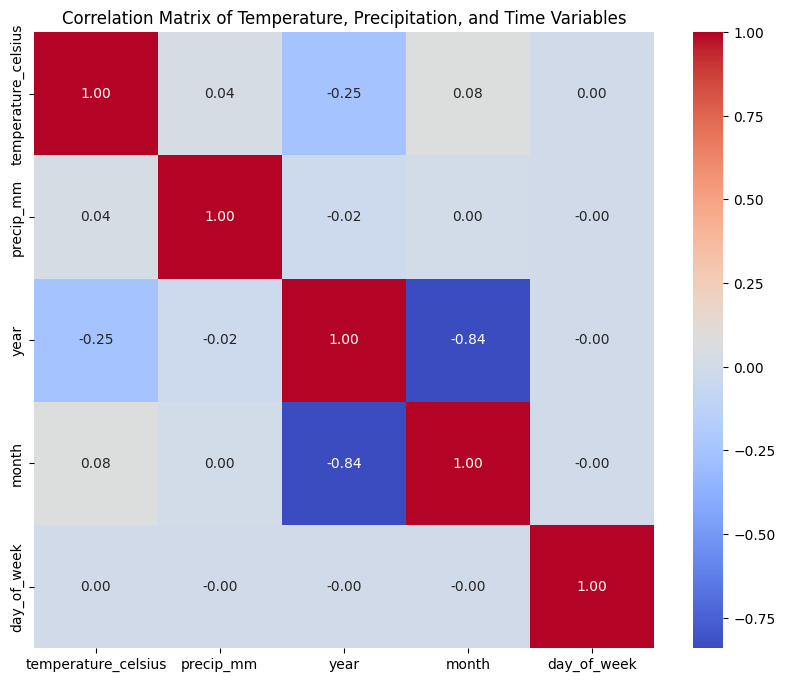

In [139]:
correlation_matrix = data[['temperature_celsius', 'precip_mm', 'year', 'month', 'day_of_week']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperature, Precipitation, and Time Variables')
plt.show()



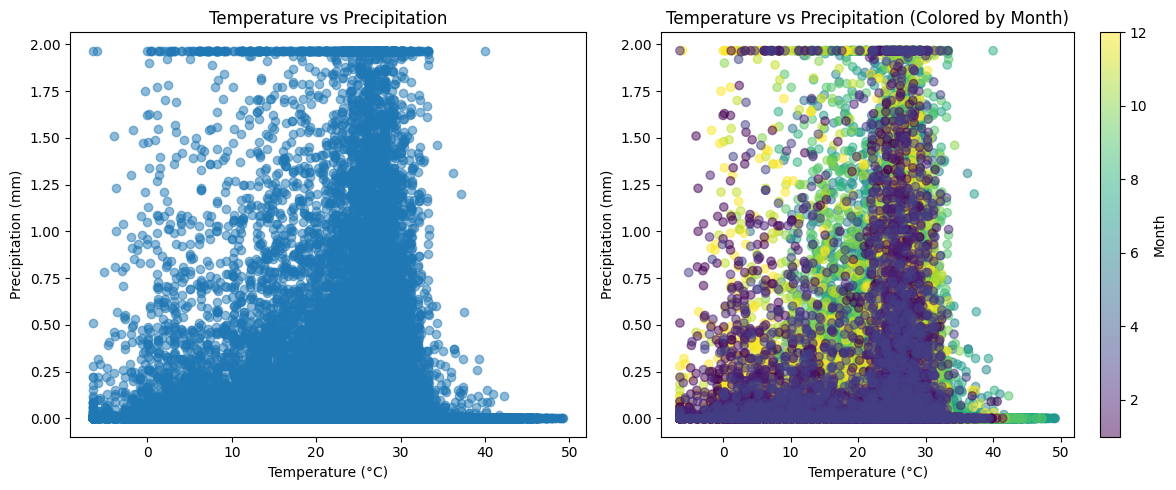

In [142]:
# Create scatter plots to visualize the relationships between temperature_celsius and precip_mm
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['temperature_celsius'], data['precip_mm'], alpha=0.5)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')

plt.subplot(1, 2, 2)
plt.scatter(data['temperature_celsius'], data['precip_mm'], c=data['month'], alpha=0.5, cmap='viridis')
plt.title('Temperature vs Precipitation (Colored by Month)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.colorbar(label='Month')

plt.tight_layout()
plt.show()

### Observations
* The scatter plot suggests that initial months with lower temperatures precipitations are not so much. Only the temperature range of 20-30 C shows varibale precipitation ranges.

In [ ]:
## Bivariate Analysis

In [12]:
import matplotlib.pyplot as plt

def plot_histograms(data, columns):

  num_columns = len(columns)
  fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 4))

  for i, column in enumerate(columns):
    ax = axes[i] if num_columns > 1 else axes  # Handle single subplot case
    ax.hist(data[column].dropna(), bins=20)
    ax.set_title(f'{column.capitalize()} Distribution')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()

In [13]:
columns = ['temperature_celsius', 'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',]

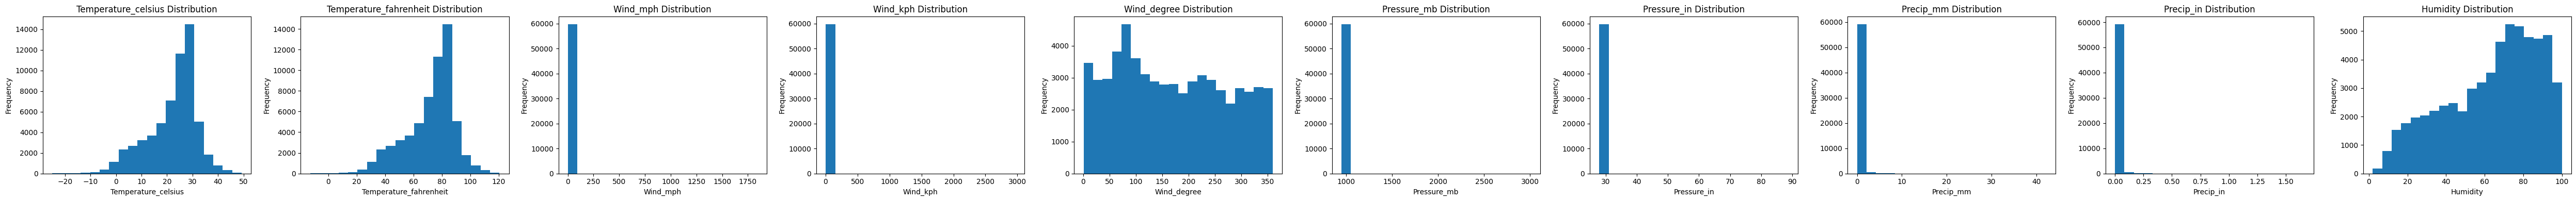

In [14]:
plot_histograms(data, columns)

In [15]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

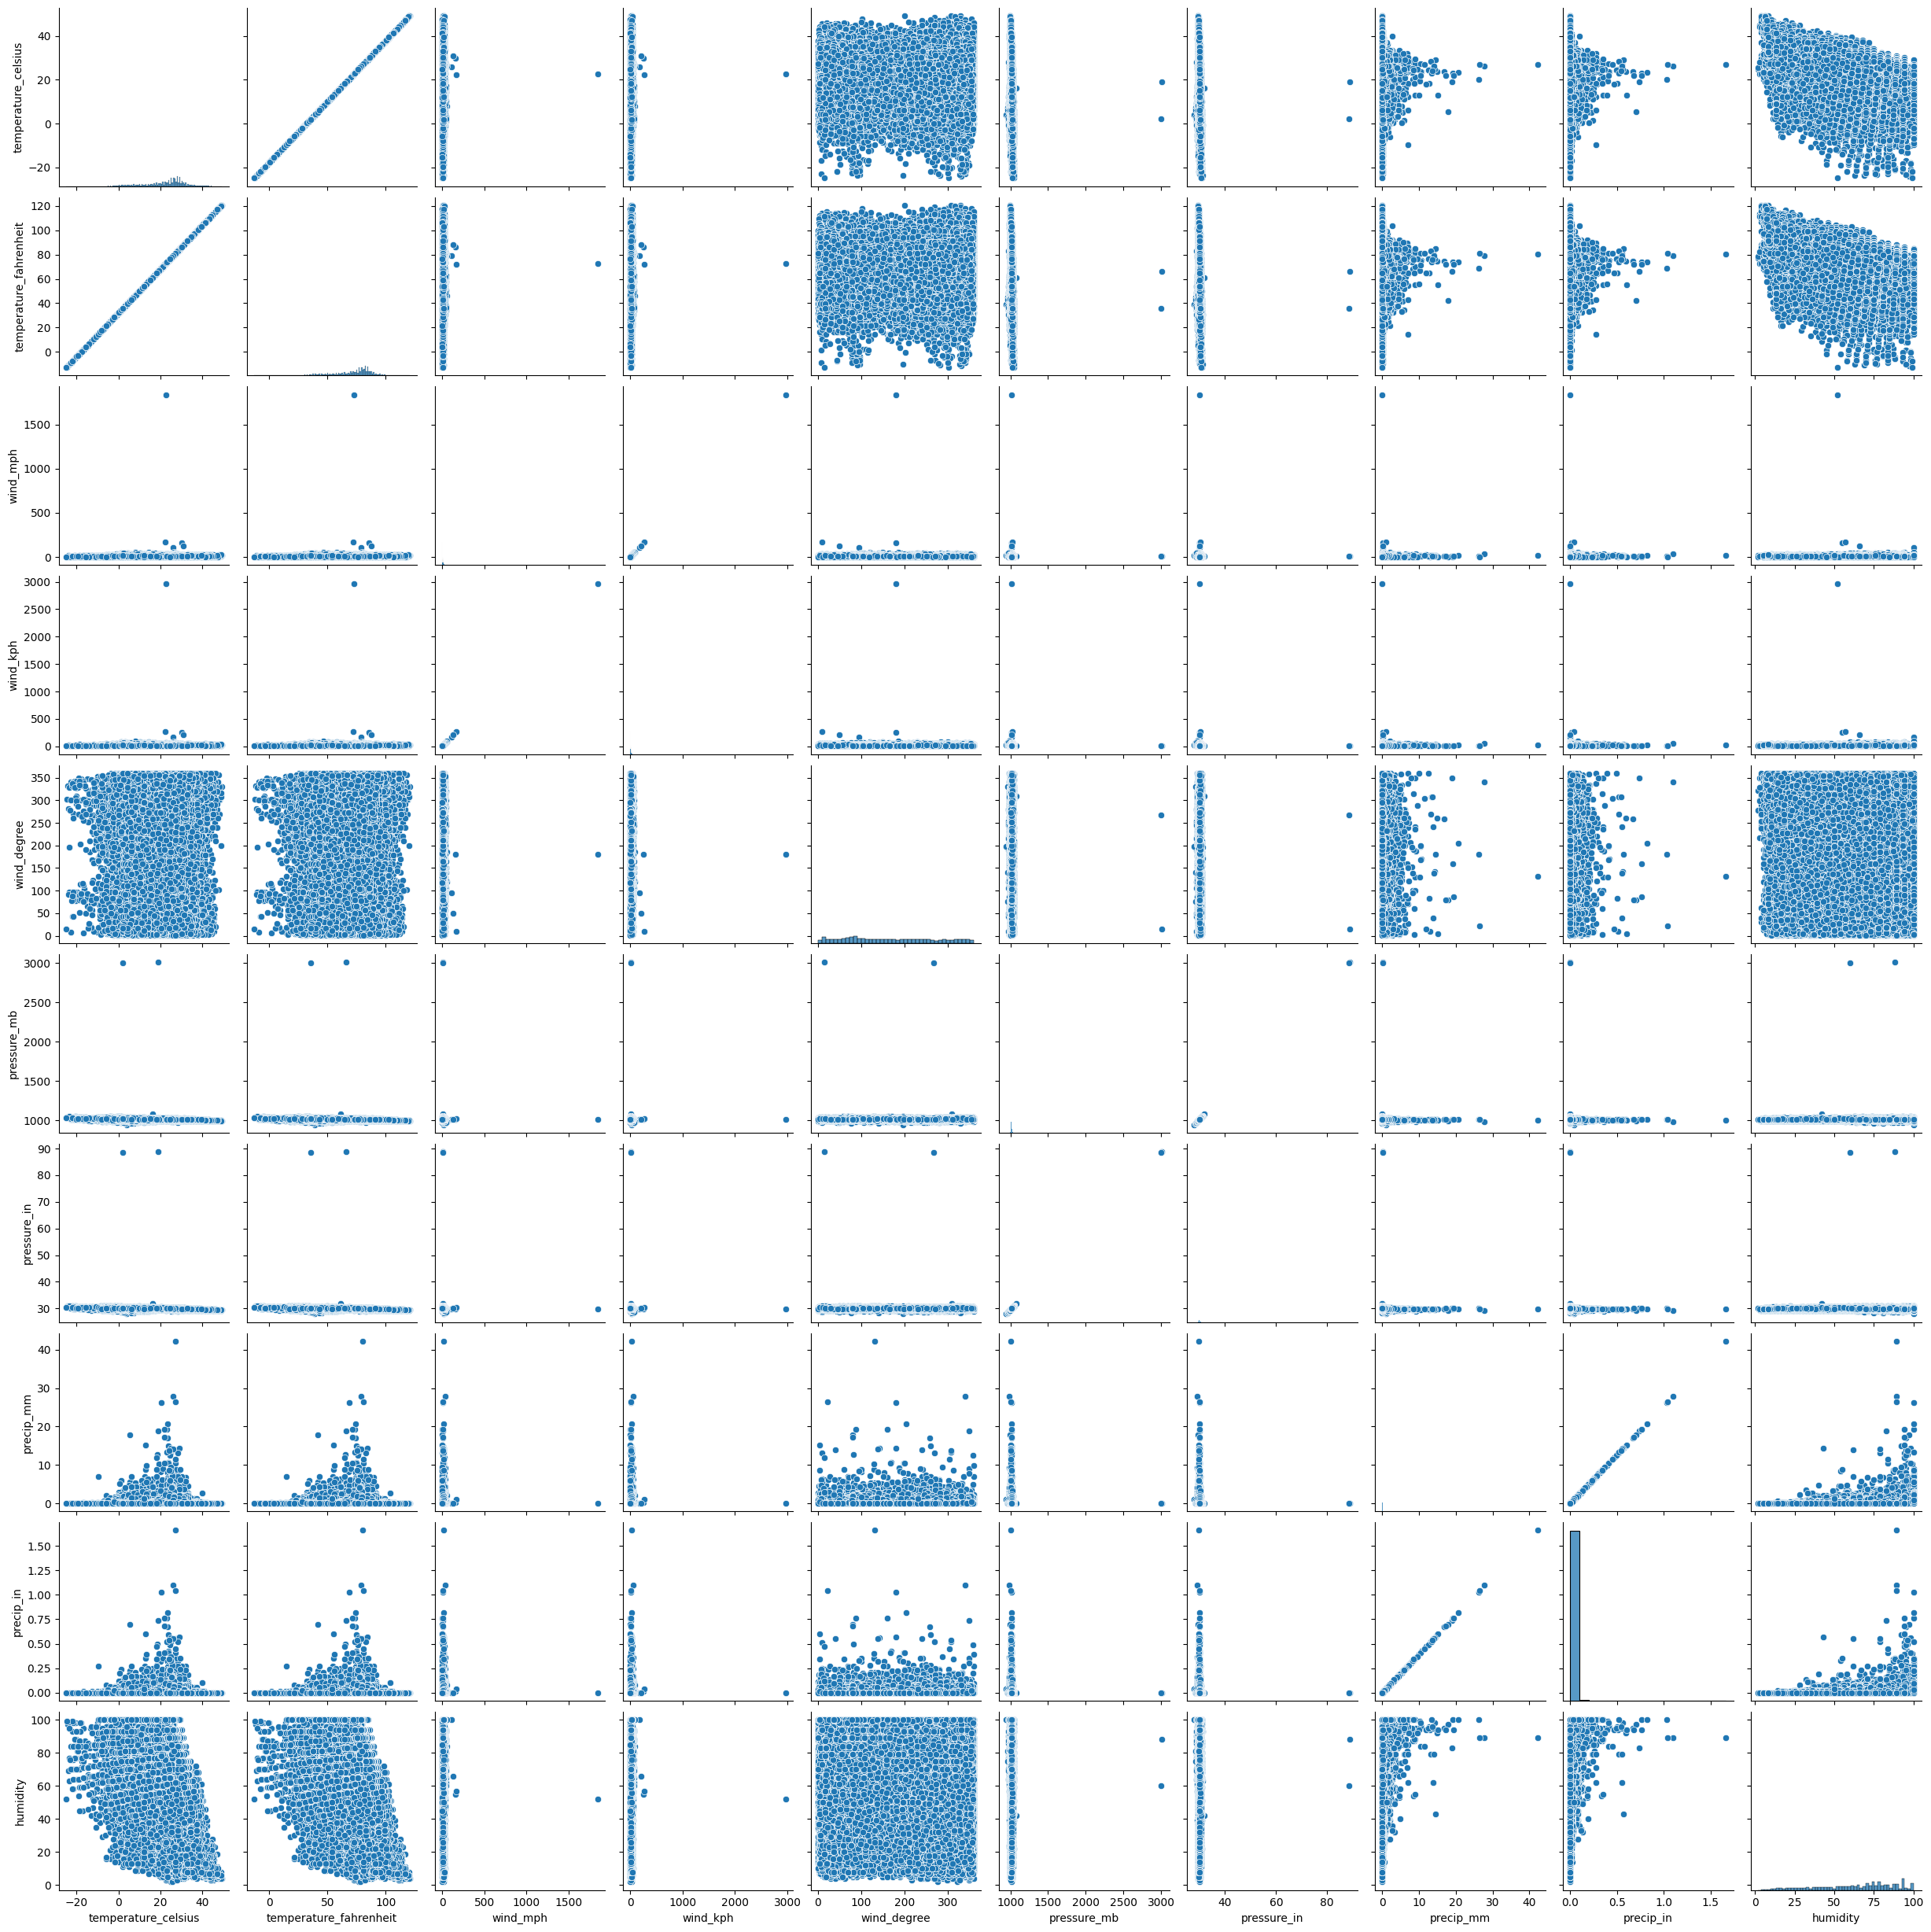

In [23]:
import seaborn as sns

sns.pairplot(data[columns])

In [18]:
# Calculate the correlation between temperature and precipitation
correlation = data['temperature_celsius'].corr(data['precip_mm'])
print("\nCorrelation between Temperature and Precipitation:", correlation)




Correlation between Temperature and Precipitation: 0.021024884071016513


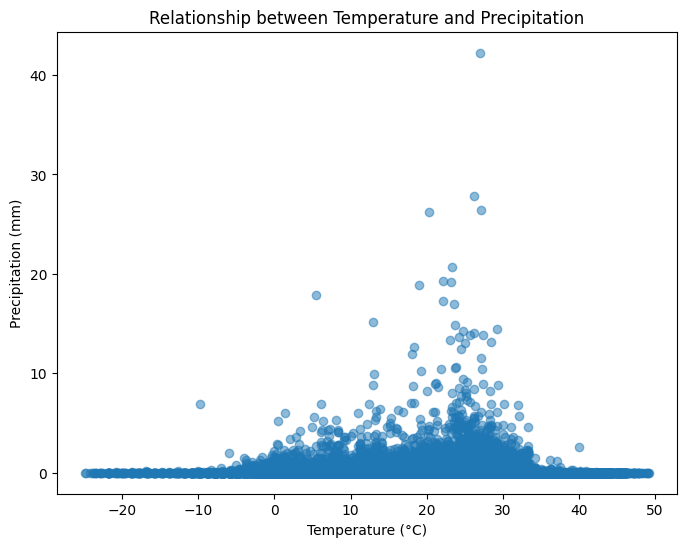

In [20]:
# Create a scatter plot to visualize the relationship between temperature and precipitation
plt.figure(figsize=(8, 6))
plt.scatter(data['temperature_celsius'], data['precip_mm'], alpha=0.5)
plt.title('Relationship between Temperature and Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()

In [144]:
from sklearn.model_selection import train_test_split

data_for_forecasting = data[['last_updated', 'temperature_celsius', 'precip_mm','humidity']]

data_for_forecasting = data_for_forecasting.set_index('last_updated')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_for_forecasting, test_size=0.2, shuffle=False)

In [153]:
from statsmodels.tsa.arima.model import ARIMA

# Resample the data to daily frequency
train_data_daily = train_data.resample('D').mean()
test_data_daily = test_data.resample('D').mean()


# Fit an ARIMA model for temperature
model_temperature = ARIMA(train_data_daily['temperature_celsius'], order=(5, 1, 0))
model_temperature_fit = model_temperature.fit()

# Fit an ARIMA model for precipitation
model_precipitation = ARIMA(train_data_daily['precip_mm'], order=(5, 1, 0))
model_precipitation_fit = model_precipitation.fit()

# Fit an ARIMA model for precipitation
model_humidity = ARIMA(train_data_daily['humidity'], order=(5, 1, 0))
model_humidity_fit = model_humidity.fit()

predictions_temperature = model_temperature_fit.predict(start=len(train_data_daily), end=len(train_data_daily) + len(test_data_daily) - 1)
predictions_precipitation = model_precipitation_fit.predict(start=len(train_data_daily), end=len(train_data_daily) + len(test_data_daily) - 1)
predictions_humidity = model_humidity_fit.predict(start=len(train_data_daily), end=len(train_data_daily) + len(test_data_daily) - 1)


In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE for temperature predictions
rmse_temperature = np.sqrt(mean_squared_error(test_data_daily['temperature_celsius'], predictions_temperature))
mae_temperature = mean_absolute_error(test_data_daily['temperature_celsius'], predictions_temperature)

# Calculate RMSE and MAE for precipitation predictions
rmse_precipitation = np.sqrt(mean_squared_error(test_data_daily['precip_mm'], predictions_precipitation))
mae_precipitation = mean_absolute_error(test_data_daily['precip_mm'], predictions_precipitation)

# Calculate RMSE and MAE for humidity predictions
rmse_humidity = np.sqrt(mean_squared_error(test_data_daily['humidity'], predictions_humidity))
mae_humidity = mean_absolute_error(test_data_daily['humidity'], predictions_humidity)

print(f"Temperature RMSE: {rmse_temperature}")
print(f"Temperature MAE: {mae_temperature}")
print(f"Precipitation RMSE: {rmse_precipitation}")
print(f"Precipitation MAE: {mae_precipitation}")
print(f"Humidity RMSE: {rmse_humidity}")
print(f"Humidity MAE: {mae_humidity}")

Temperature RMSE: 1.8246048065728377
Temperature MAE: 1.4331787018062232
Precipitation RMSE: 0.041177408396275726
Precipitation MAE: 0.0359088486060608
Humidity RMSE: 2.359714472653788
Humidity MAE: 1.8823252947837872


Temperature MAPE: 0.0748497152657328
Precipitation MAPE: 0.3232608332688146
Humidity MAPE: 0.02912752473824174


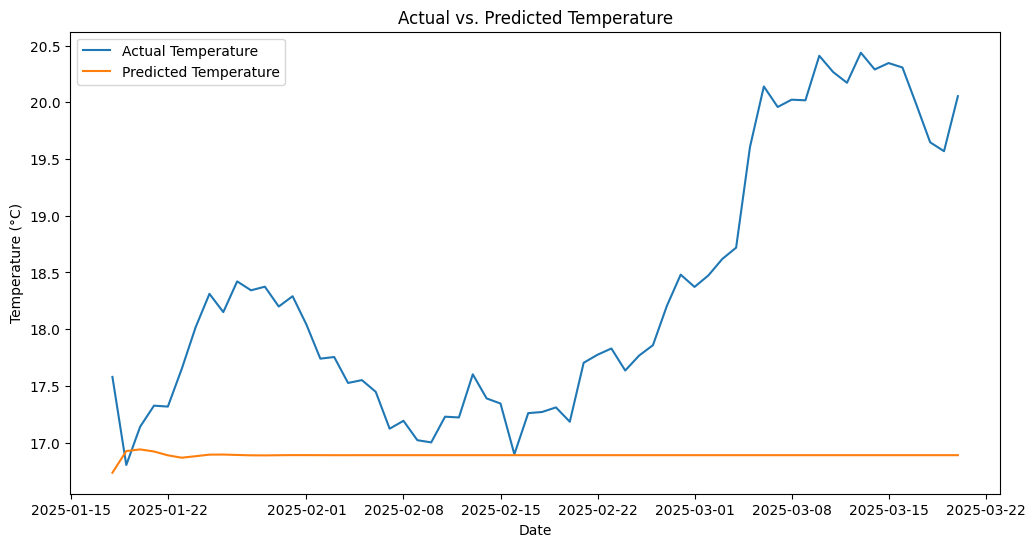

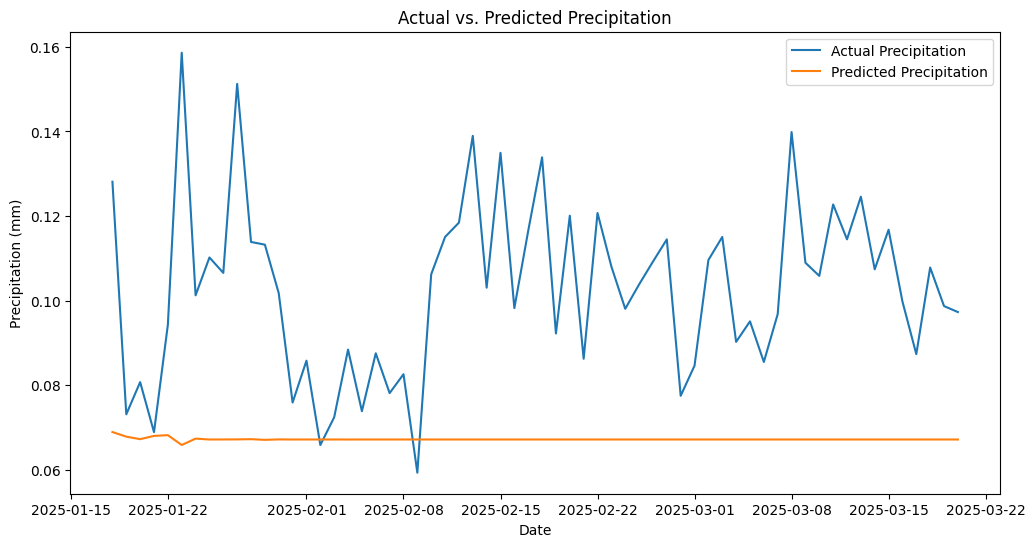

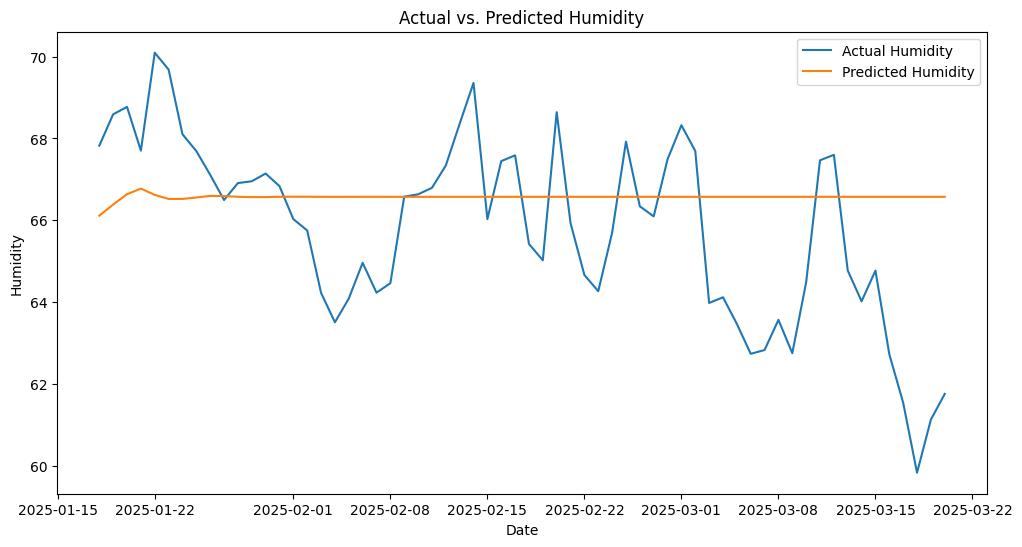

In [156]:
from sklearn.metrics import mean_absolute_percentage_error


mape_temperature = mean_absolute_percentage_error(test_data_daily['temperature_celsius'], predictions_temperature)


mape_precipitation = mean_absolute_percentage_error(test_data_daily['precip_mm'], predictions_precipitation)


mape_humidity = mean_absolute_percentage_error(test_data_daily['humidity'], predictions_humidity)


print(f"Temperature MAPE: {mape_temperature}")
print(f"Precipitation MAPE: {mape_precipitation}")
print(f"Humidity MAPE: {mape_humidity}")


# Visualize actual vs. predicted values for temperature
plt.figure(figsize=(12, 6))
plt.plot(test_data_daily.index, test_data_daily['temperature_celsius'], label='Actual Temperature')
plt.plot(test_data_daily.index, predictions_temperature, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.show()

# Visualize actual vs. predicted values for precipitation
plt.figure(figsize=(12, 6))
plt.plot(test_data_daily.index, test_data_daily['precip_mm'], label='Actual Precipitation')
plt.plot(test_data_daily.index, predictions_precipitation, label='Predicted Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs. Predicted Precipitation')
plt.legend()
plt.show()

# Visualize actual vs. predicted values for precipitation
plt.figure(figsize=(12, 6))
plt.plot(test_data_daily.index, test_data_daily['humidity'], label='Actual Humidity')
plt.plot(test_data_daily.index, predictions_humidity, label='Predicted Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Actual vs. Predicted Humidity')
plt.legend()
plt.show()

### Trying LSTM Implementation

In [158]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [160]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['temperature_celsius']])

# Create sequences of data (X = past n time steps, y = next time step)
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 300  
X, y = create_sequences(data_scaled, n_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data to fit LSTM input requirements (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer for forecasting the next value

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling the predictions
predictions_rescaled = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions_rescaled))
print(f'RMSE: {rmse}')

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1489/1489 ━━━━━━━━━━━━━━━━━━━━ 292s 194ms/step - loss: 0.0319
Epoch 2/3
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 284s 190ms/step - loss: 0.0237
Epoch 3/3
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 282s 189ms/step - loss: 0.0228
373/373 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step
RMSE: 18.046165328069694


In [161]:
mean_squared_error(y_test, predictions_rescaled)

325.66408304802474